In [1]:
import utils
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import importlib
import utils

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\agand\\OneDrive\\Escritorio\\lakes\\lake-algae-analysis\\notebooks\\utils.py'>

142


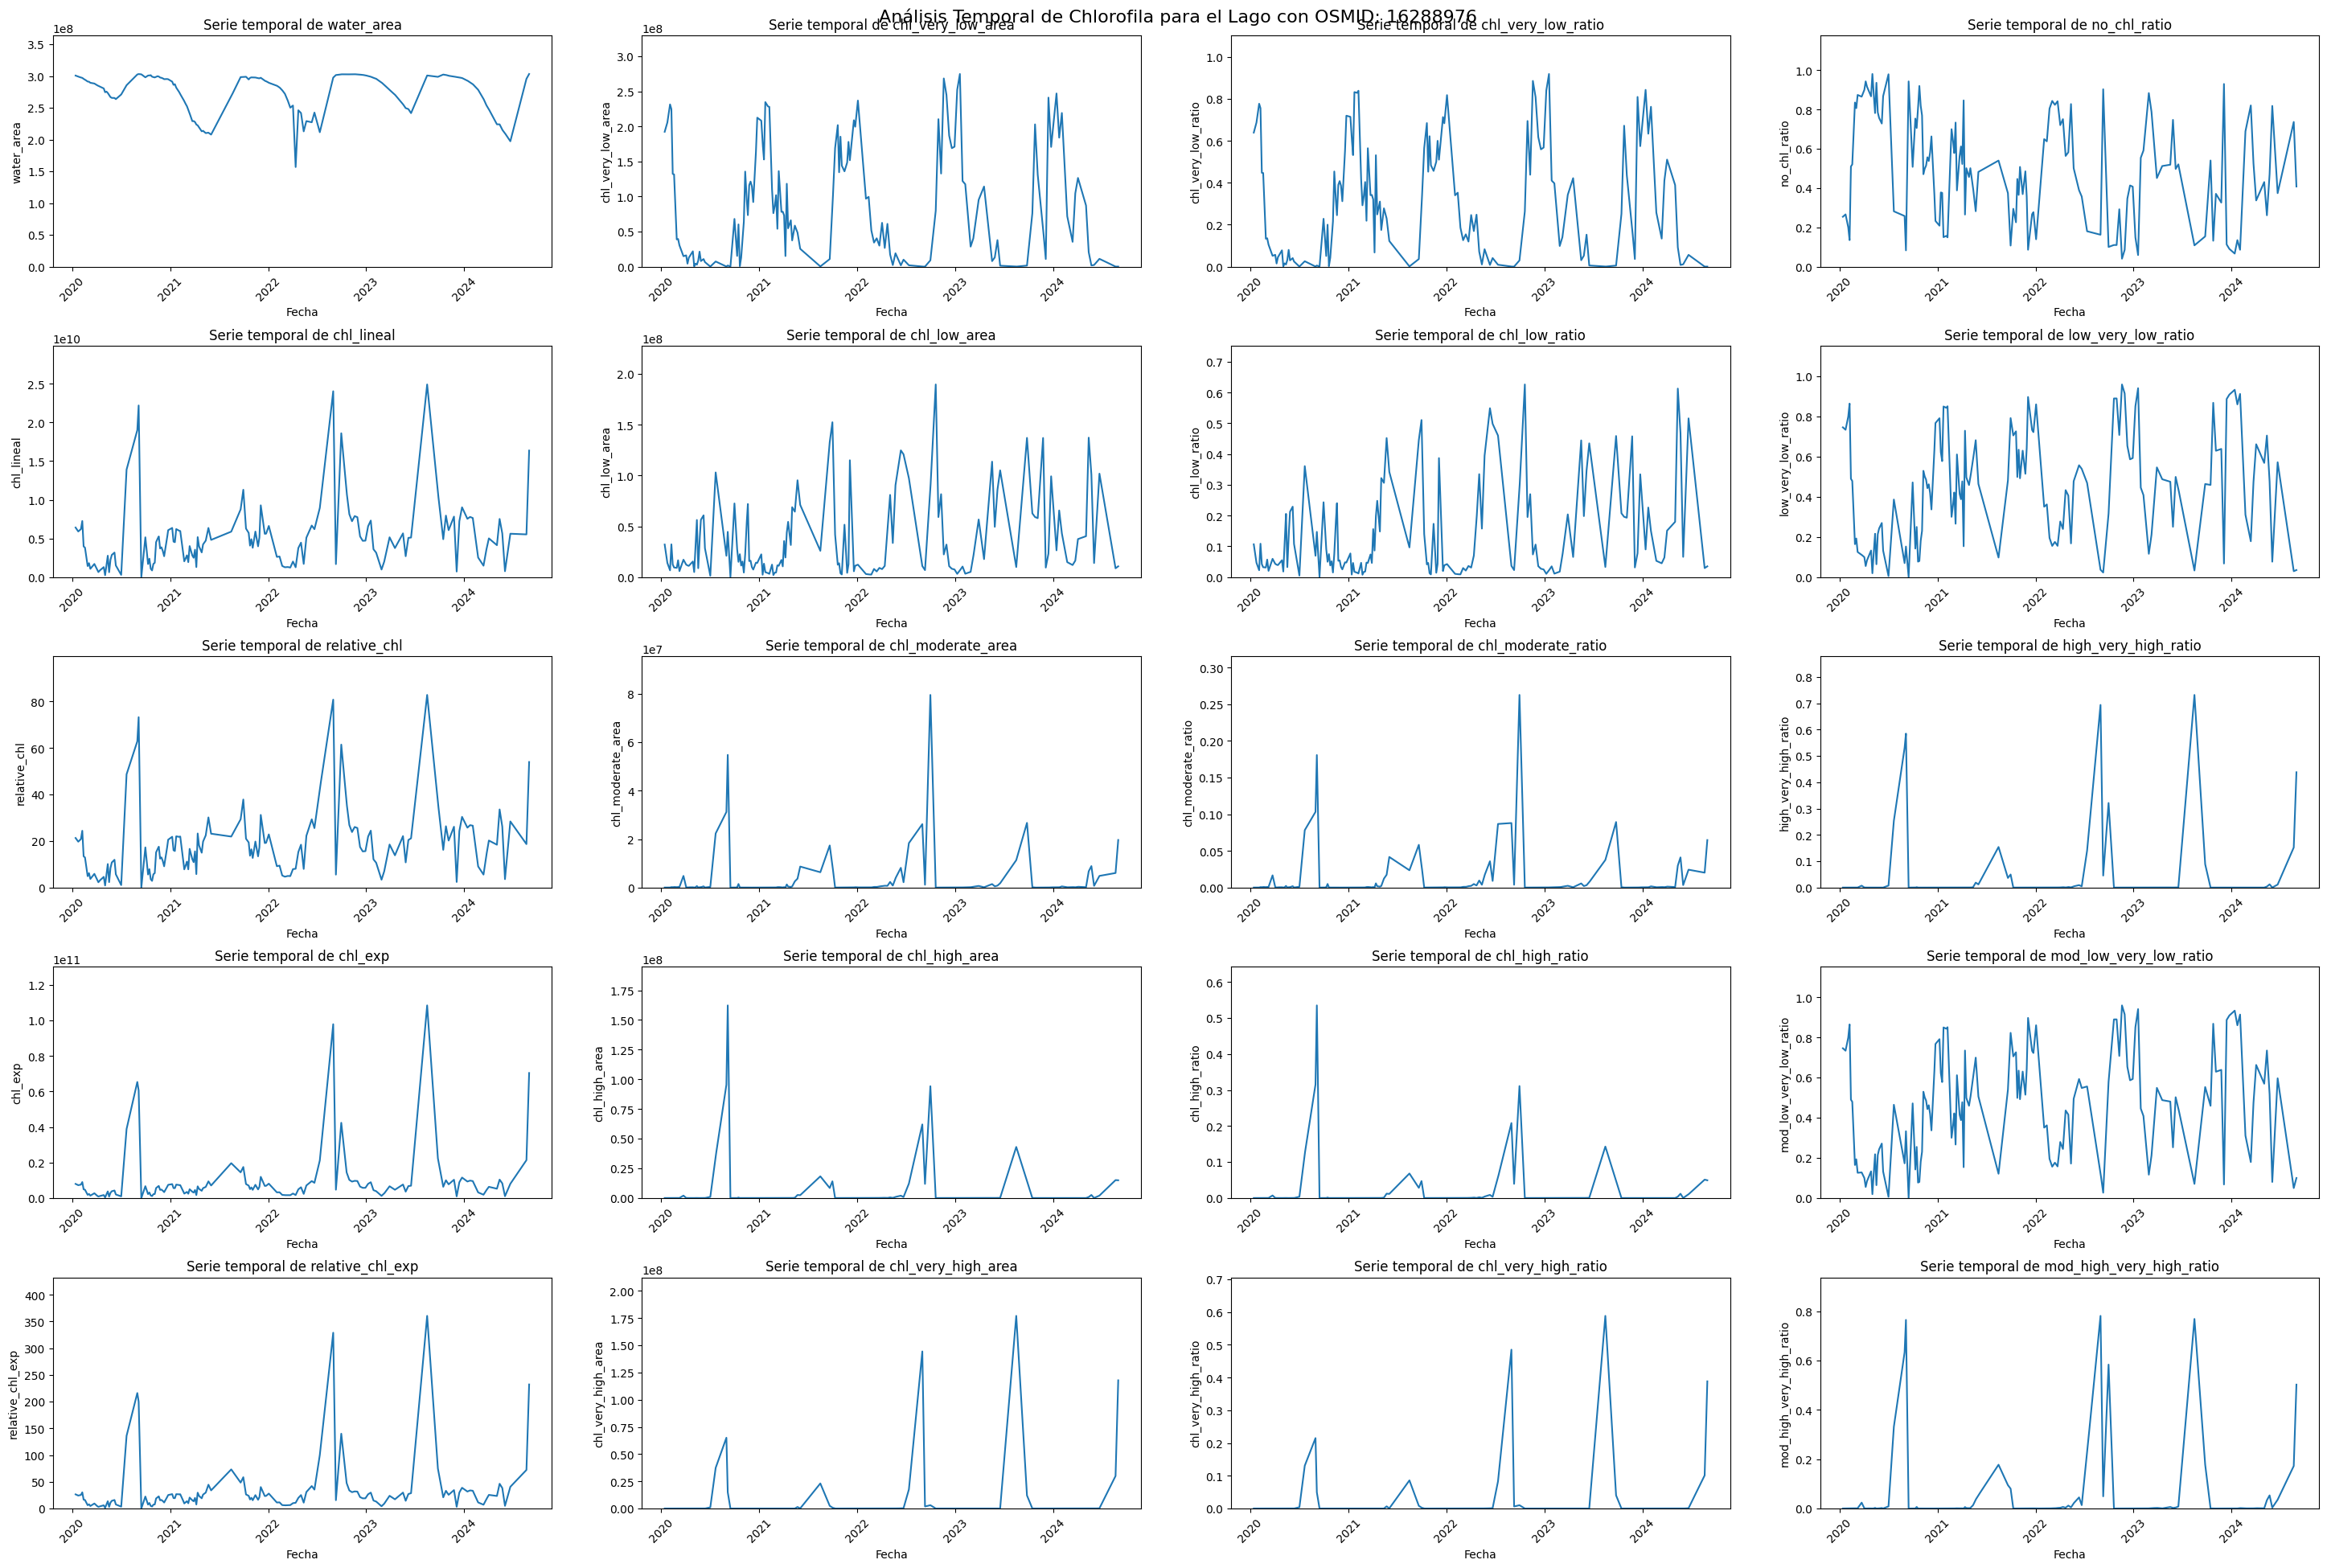

In [3]:
utils.plot_time_series(16288976)

### Ban Sagar Lake

In [4]:
all_saved_logs = pd.read_csv(r"../data/all_saved_logs.csv")
all_saved_logs["day"] = pd.to_datetime(all_saved_logs["day"], format='%Y-%m-%d')
ban_sagar = all_saved_logs[(all_saved_logs['osmid'] == str(16288976))
                           & (all_saved_logs['exists_true_image'] == True)
                           & (all_saved_logs['water_area'] > 100000000)
                           ].sort_values(by='day').copy()
ban_sagar = utils.calculate_chl(ban_sagar)
ban_sagar = utils.calculate_chl(ban_sagar, 'exp')

In [5]:
ban_sagar

osmid        day  exists_true_image  total_pixel_area   water_area  \
2612  16288976 2020-01-04               True       301224375.0  299988125.0   
2613  16288976 2020-01-09               True       301224375.0  299186875.0   
2614  16288976 2020-01-14               True       301224375.0  300753125.0   
2615  16288976 2020-01-19               True       301224375.0  298488125.0   
2616  16288976 2020-01-24               True       301224375.0  299093125.0   
...        ...        ...                ...               ...          ...   
2529  16288976 2024-07-11               True       301224375.0  169982500.0   
2530  16288976 2024-07-21               True       301224375.0  150466875.0   
2532  16288976 2024-08-10               True       301224375.0  245302500.0   
2533  16288976 2024-08-20               True       301224375.0  295643125.0   
2534  16288976 2024-08-30               True       301224375.0  303271875.0   

       cloud_area  water_with_no_clouds_area  no_chl_area  chl_very_low_area  \
2612   70009375.0                233634375.0   90687500.0        107777500.0   
2613  102713750.0                203115000.0  118737500.0         68325625.0   
2614          0.0                300753125.0   76343750.0        192343750.0   
2615   82897500.0                219533125.0   73485625.0        136472500.0   
2616          0.0                299093125.0   79513750.0        205591250.0   
...           ...                        ...          ...                ...   
2529  308504375.0                   126875.0     126875.0                0.0   
2530  307465000.0                  1166250.0    1166250.0                0.0   
2532  171775000.0                131826875.0  130000000.0                0.0   
2533   21490625.0                277387500.0  217750000.0            15000.0   
2534   17234375.0                286690625.0  123650000.0             8125.0   

      chl_low_area  chl_moderate_area  chl_high_area  chl_very_high_area  \
2612    35155625.0            13750.0            0.0                 0.0   
2613    16041250.0             5000.0          625.0              5000.0   
2614    32056250.0             9375.0            0.0                 0.0   
2615     9571250.0             3750.0            0.0                 0.0   
2616    13950625.0            36875.0          625.0                 0.0   
...            ...                ...            ...                 ...   
2529           0.0                0.0            0.0                 0.0   
2530           0.0                0.0            0.0                 0.0   
2532           0.0                0.0        23750.0           1803125.0   
2533     8638125.0          6003750.0     15086875.0          29893750.0   
2534    10586875.0         19644375.0     14945625.0         117855625.0   

        chl_lineal       chl_exp  
2612  4.401538e+09  5.539015e+09  
2613  2.496797e+09  3.120464e+09  
2614  6.410129e+09  7.950641e+09  
2615  3.928000e+09  4.811101e+09  
2616  5.897569e+09  7.222459e+09  
...            ...           ...  
2529  0.000000e+00  0.000000e+00  
2530  0.000000e+00  0.000000e+00  
2532  2.037321e+08  9.742451e+08  
2533  5.522249e+09  2.133029e+10  
2534  1.637147e+10  7.039277e+10  

[217 rows x 15 columns]

### Water

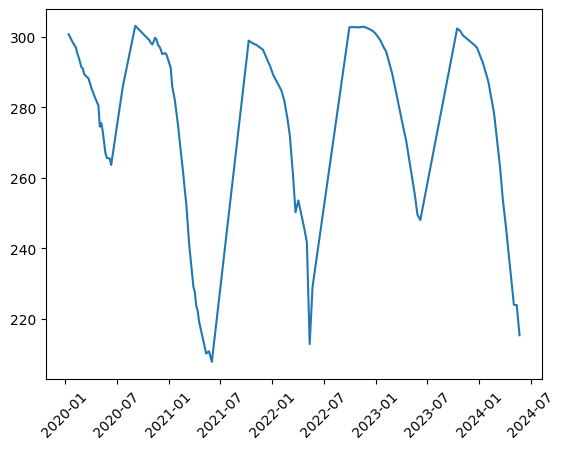

In [22]:
water_df = ban_sagar[ban_sagar['cloud_area'] < 500000][['day', 'water_area']].copy()
water_df.loc[:,'water_area'] = water_df['water_area']/1000000
water_df.set_index('day', inplace = True)
all_days = pd.date_range(start=water_df.index.min(), end=water_df.index.max(), freq='D')
water_reindexed = water_df.reindex(all_days)
water_reindexed["water_area"] = water_reindexed['water_area'].interpolate(method='linear')
water_reindexed.reset_index(inplace=True)
water_reindexed.rename(columns={'index': 'day'}, inplace=True)

plt.plot(water_reindexed['day'], water_reindexed['water_area'])
plt.tick_params(axis='x', rotation=45)
plt.show()

In [18]:
len(water_df)

108

In [19]:
water_df

water_area
day                   
2020-01-14  300.753125
2020-01-24  299.093125
2020-02-03  297.673750
2020-02-08  297.121250
2020-02-13  295.469375
...                ...
2024-03-23  254.622500
2024-04-02  247.678125
2024-05-02  224.026875
2024-05-12  223.950625
2024-05-22  215.378750

[108 rows x 1 columns]

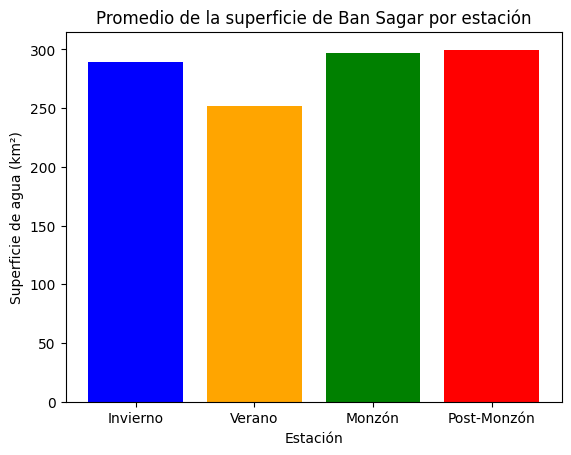

In [23]:
def asignar_estacion(fecha):
    mes = fecha.month
    if mes in [3, 4, 5, 6]:
        return 'Verano'
    elif mes in [7, 8, 9]:
        return 'Monzón'
    elif mes in [10, 11]:
        return 'Post-Monzón'
    elif mes in [12, 1, 2]:
        return 'Invierno'

water_df.reset_index(inplace=True)
water_df.rename(columns={'index': 'day'}, inplace=True)
# Asignar estaciones a cada registro en el DataFrame
water_df['estacion'] = water_df['day'].apply(asignar_estacion)

# Agrupar los datos por estación y calcular la media del área de agua
estaciones_df = water_df.groupby('estacion')['water_area'].mean().reset_index()

# Ordenar las estaciones para que aparezcan en orden lógico en el gráfico
orden_estaciones = ['Invierno', 'Verano', 'Monzón', 'Post-Monzón']
estaciones_df['estacion'] = pd.Categorical(estaciones_df['estacion'], categories=orden_estaciones, ordered=True)
estaciones_df = estaciones_df.sort_values('estacion')

# Crear el gráfico de barras
plt.bar(estaciones_df['estacion'], estaciones_df['water_area'], color=['blue', 'orange', 'green', 'red'])
plt.title("Promedio de la superficie de Ban Sagar por estación")
plt.xlabel("Estación")
plt.ylabel("Superficie de agua (km²)")
plt.show()

In [21]:
water_df

day  water_area  estacion
0   2020-01-14  300.753125  Invierno
1   2020-01-24  299.093125  Invierno
2   2020-02-03  297.673750  Invierno
3   2020-02-08  297.121250  Invierno
4   2020-02-13  295.469375  Invierno
..         ...         ...       ...
103 2024-03-23  254.622500    Verano
104 2024-04-02  247.678125    Verano
105 2024-05-02  224.026875    Verano
106 2024-05-12  223.950625    Verano
107 2024-05-22  215.378750    Verano

[108 rows x 3 columns]

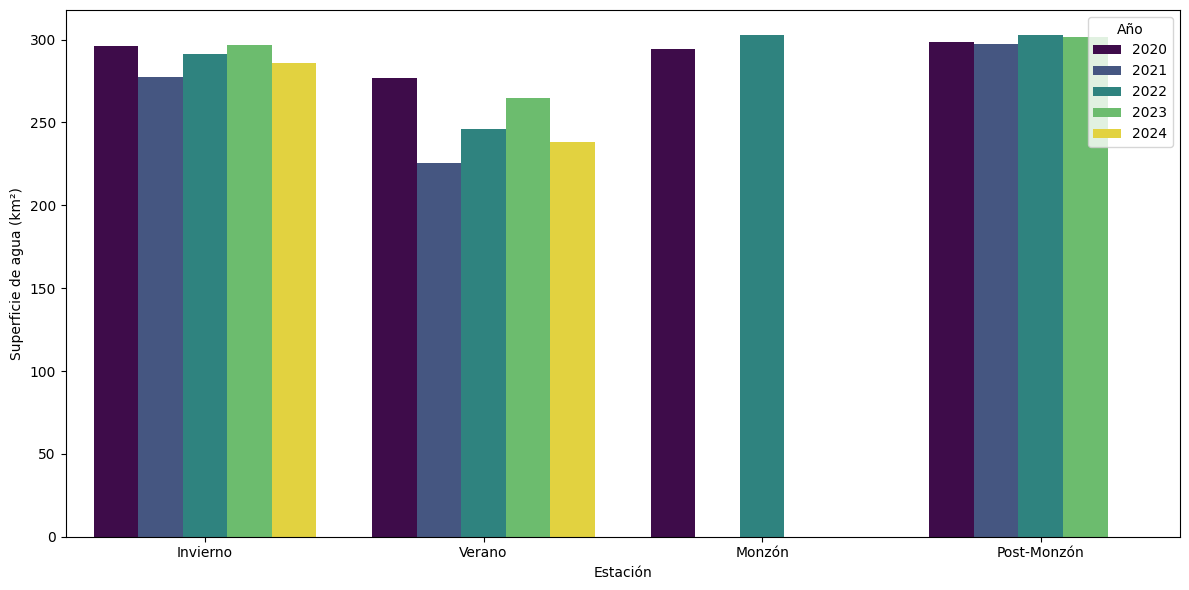

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# water_df.reset_index(inplace=True)
# water_df.rename(columns={'index': 'day'}, inplace=True)
# print(water_df)
# Asignar estaciones y años a cada registro
water_df['estacion'] = water_df['day'].apply(asignar_estacion)
water_df['year'] = water_df['day'].dt.year

# Agrupar los datos por año y estación, y calcular el promedio de water_area
estaciones_df = water_df.groupby(['year', 'estacion'])['water_area'].mean().reset_index()

# Ordenar las estaciones para que aparezcan en orden lógico en el gráfico
orden_estaciones = ['Invierno', 'Verano', 'Monzón', 'Post-Monzón']
estaciones_df['estacion'] = pd.Categorical(estaciones_df['estacion'], categories=orden_estaciones, ordered=True)

# Crear el gráfico de barras agrupadas usando seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='estacion', y='water_area', hue='year', data=estaciones_df, palette='viridis')

# Añadir título y etiquetas
plt.xlabel("Estación")
plt.ylabel("Superficie de agua (km²)")
plt.xticks()

handles, labels = ax.get_legend_handles_labels()
labels = [label.replace('year', 'Año') for label in labels]
ax.legend(handles, labels, title='Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


C:\Users\agand\AppData\Local\Temp\ipykernel_31688\3429816337.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meses_df = water_df.groupby(['year', 'mes'])['water_area'].mean().reset_index()


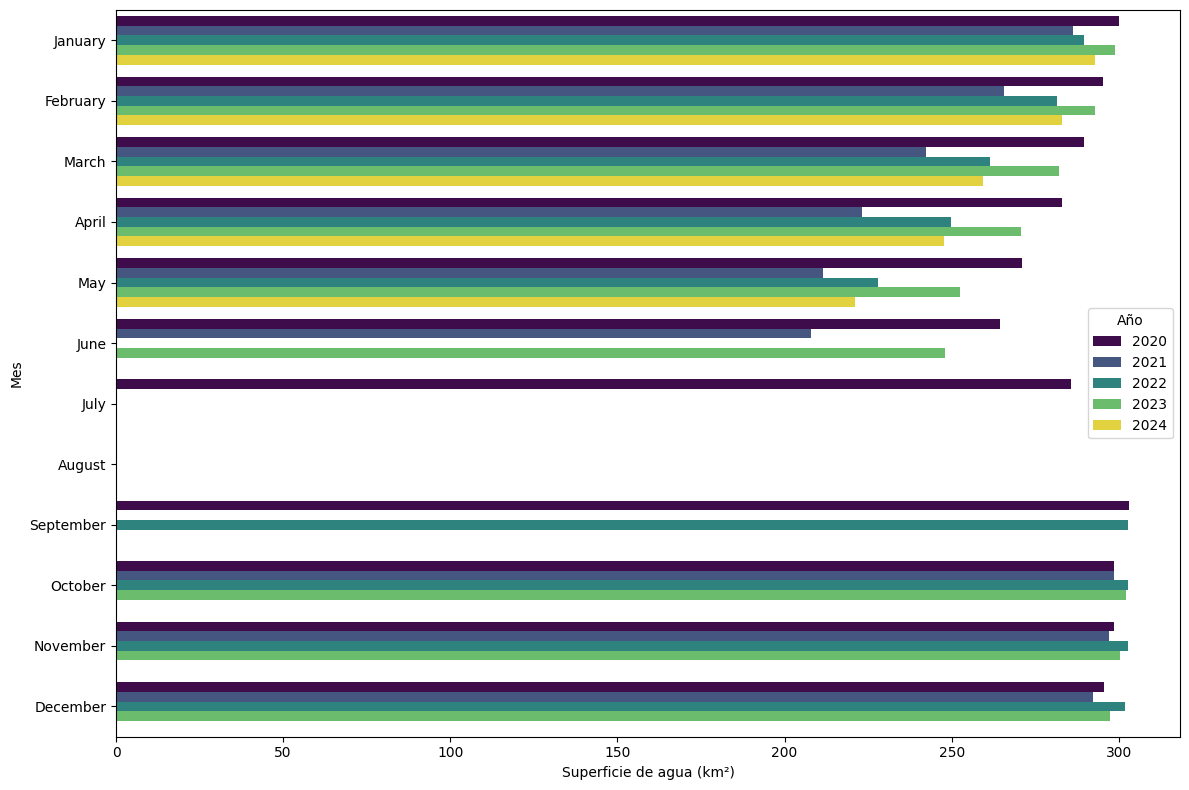

In [25]:
def asignar_mes(fecha):
    return fecha.strftime('%B')  # Obtener el nombre del mes

# Asignar meses y años a cada registro
water_df['mes'] = water_df['day'].apply(asignar_mes)
water_df['year'] = water_df['day'].dt.year

# Ordenar los meses para que aparezcan en orden cronológico
orden_meses = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
water_df['mes'] = pd.Categorical(water_df['mes'], categories=orden_meses, ordered=True)

# Agrupar los datos por año y mes, y calcular el promedio de water_area
meses_df = water_df.groupby(['year', 'mes'])['water_area'].mean().reset_index()

# Crear el gráfico de barras agrupadas, ahora horizontal, usando seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(y='mes', x='water_area', hue='year', data=meses_df, palette='viridis')

# Añadir título y etiquetas
plt.ylabel("Mes")
plt.xlabel("Superficie de agua (km²)")
plt.yticks(rotation=0)

handles, labels = ax.get_legend_handles_labels()
labels = [label.replace('year', 'Año') for label in labels]
ax.legend(handles, labels, title='Año')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\agand\AppData\Local\Temp\ipykernel_11388\3724454721.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meses_df = water_df.groupby(['year', 'mes'])['water_area'].mean().reset_index()


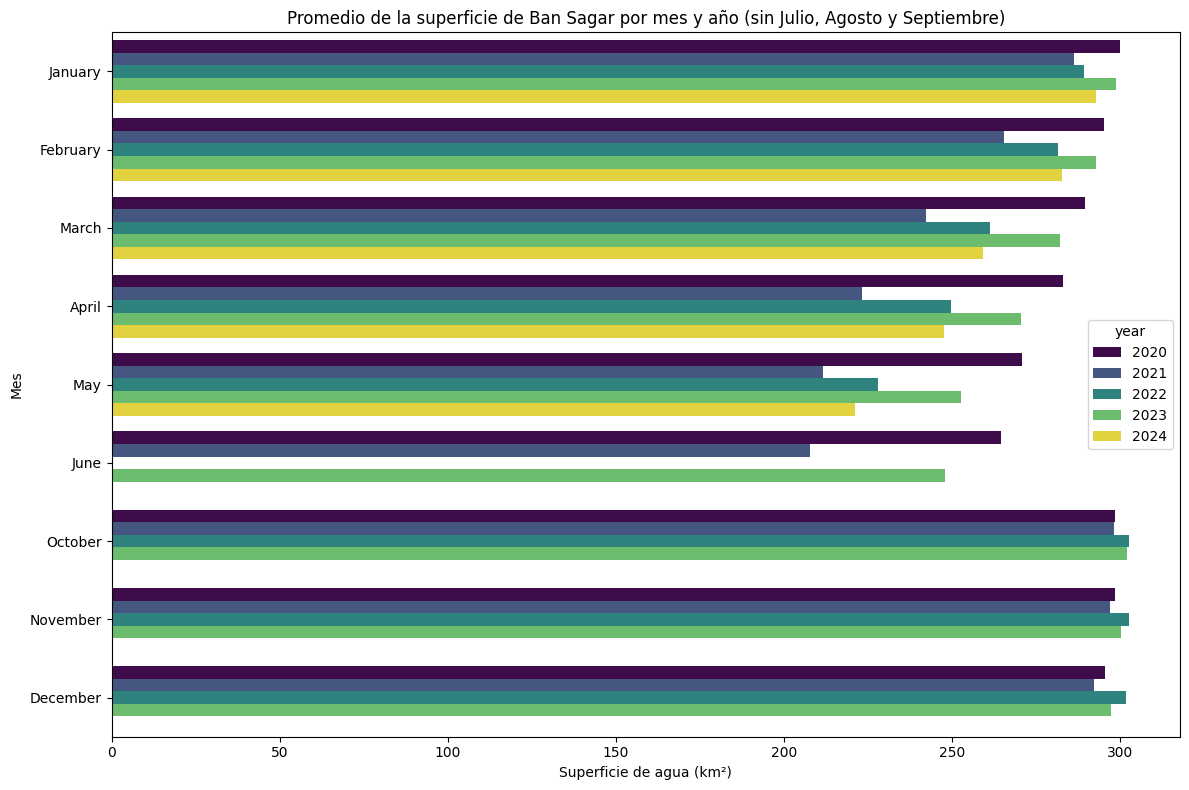

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una función para asignar meses basados en la fecha
def asignar_mes(fecha):
    return fecha.strftime('%B')  # Obtener el nombre del mes

water_df['mes'] = water_df['day'].apply(asignar_mes)
water_df['year'] = water_df['day'].dt.year

# Asignar meses y años a cada registro
water_df['mes'] = water_df['day'].apply(asignar_mes)
water_df['year'] = water_df['day'].dt.year

# Ordenar los meses para que aparezcan en orden cronológico
orden_meses = [
    'January', 'February', 'March', 'April', 'May', 'June', 'October', 'November', 'December'
]
water_df['mes'] = pd.Categorical(water_df['mes'], categories=orden_meses, ordered=True)

# Agrupar los datos por año y mes, y calcular el promedio de water_area
meses_df = water_df.groupby(['year', 'mes'])['water_area'].mean().reset_index()

# Filtrar los datos para eliminar los meses de Julio, Agosto y Septiembre
meses_df = meses_df[~meses_df['mes'].isin(['July', 'August', 'September'])]

# Crear el gráfico de barras agrupadas, ahora horizontal, usando seaborn
plt.figure(figsize=(12, 8))
sns.barplot(y='mes', x='water_area', hue='year', data=meses_df, palette='viridis')

# Añadir título y etiquetas
plt.title("Promedio de la superficie de Ban Sagar por mes y año (sin Julio, Agosto y Septiembre)")
plt.ylabel("Mes")
plt.xlabel("Superficie de agua (km²)")
plt.yticks(rotation=0)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### chl

In [26]:
days_to_remove = [datetime(2022, 9, 10)]
no_clouds_logs = ban_sagar[(ban_sagar['water_with_no_clouds_area'] > 100000000) & (ban_sagar['cloud_area'] < 75000000) & (~ban_sagar['day'].isin(days_to_remove))].copy()

150


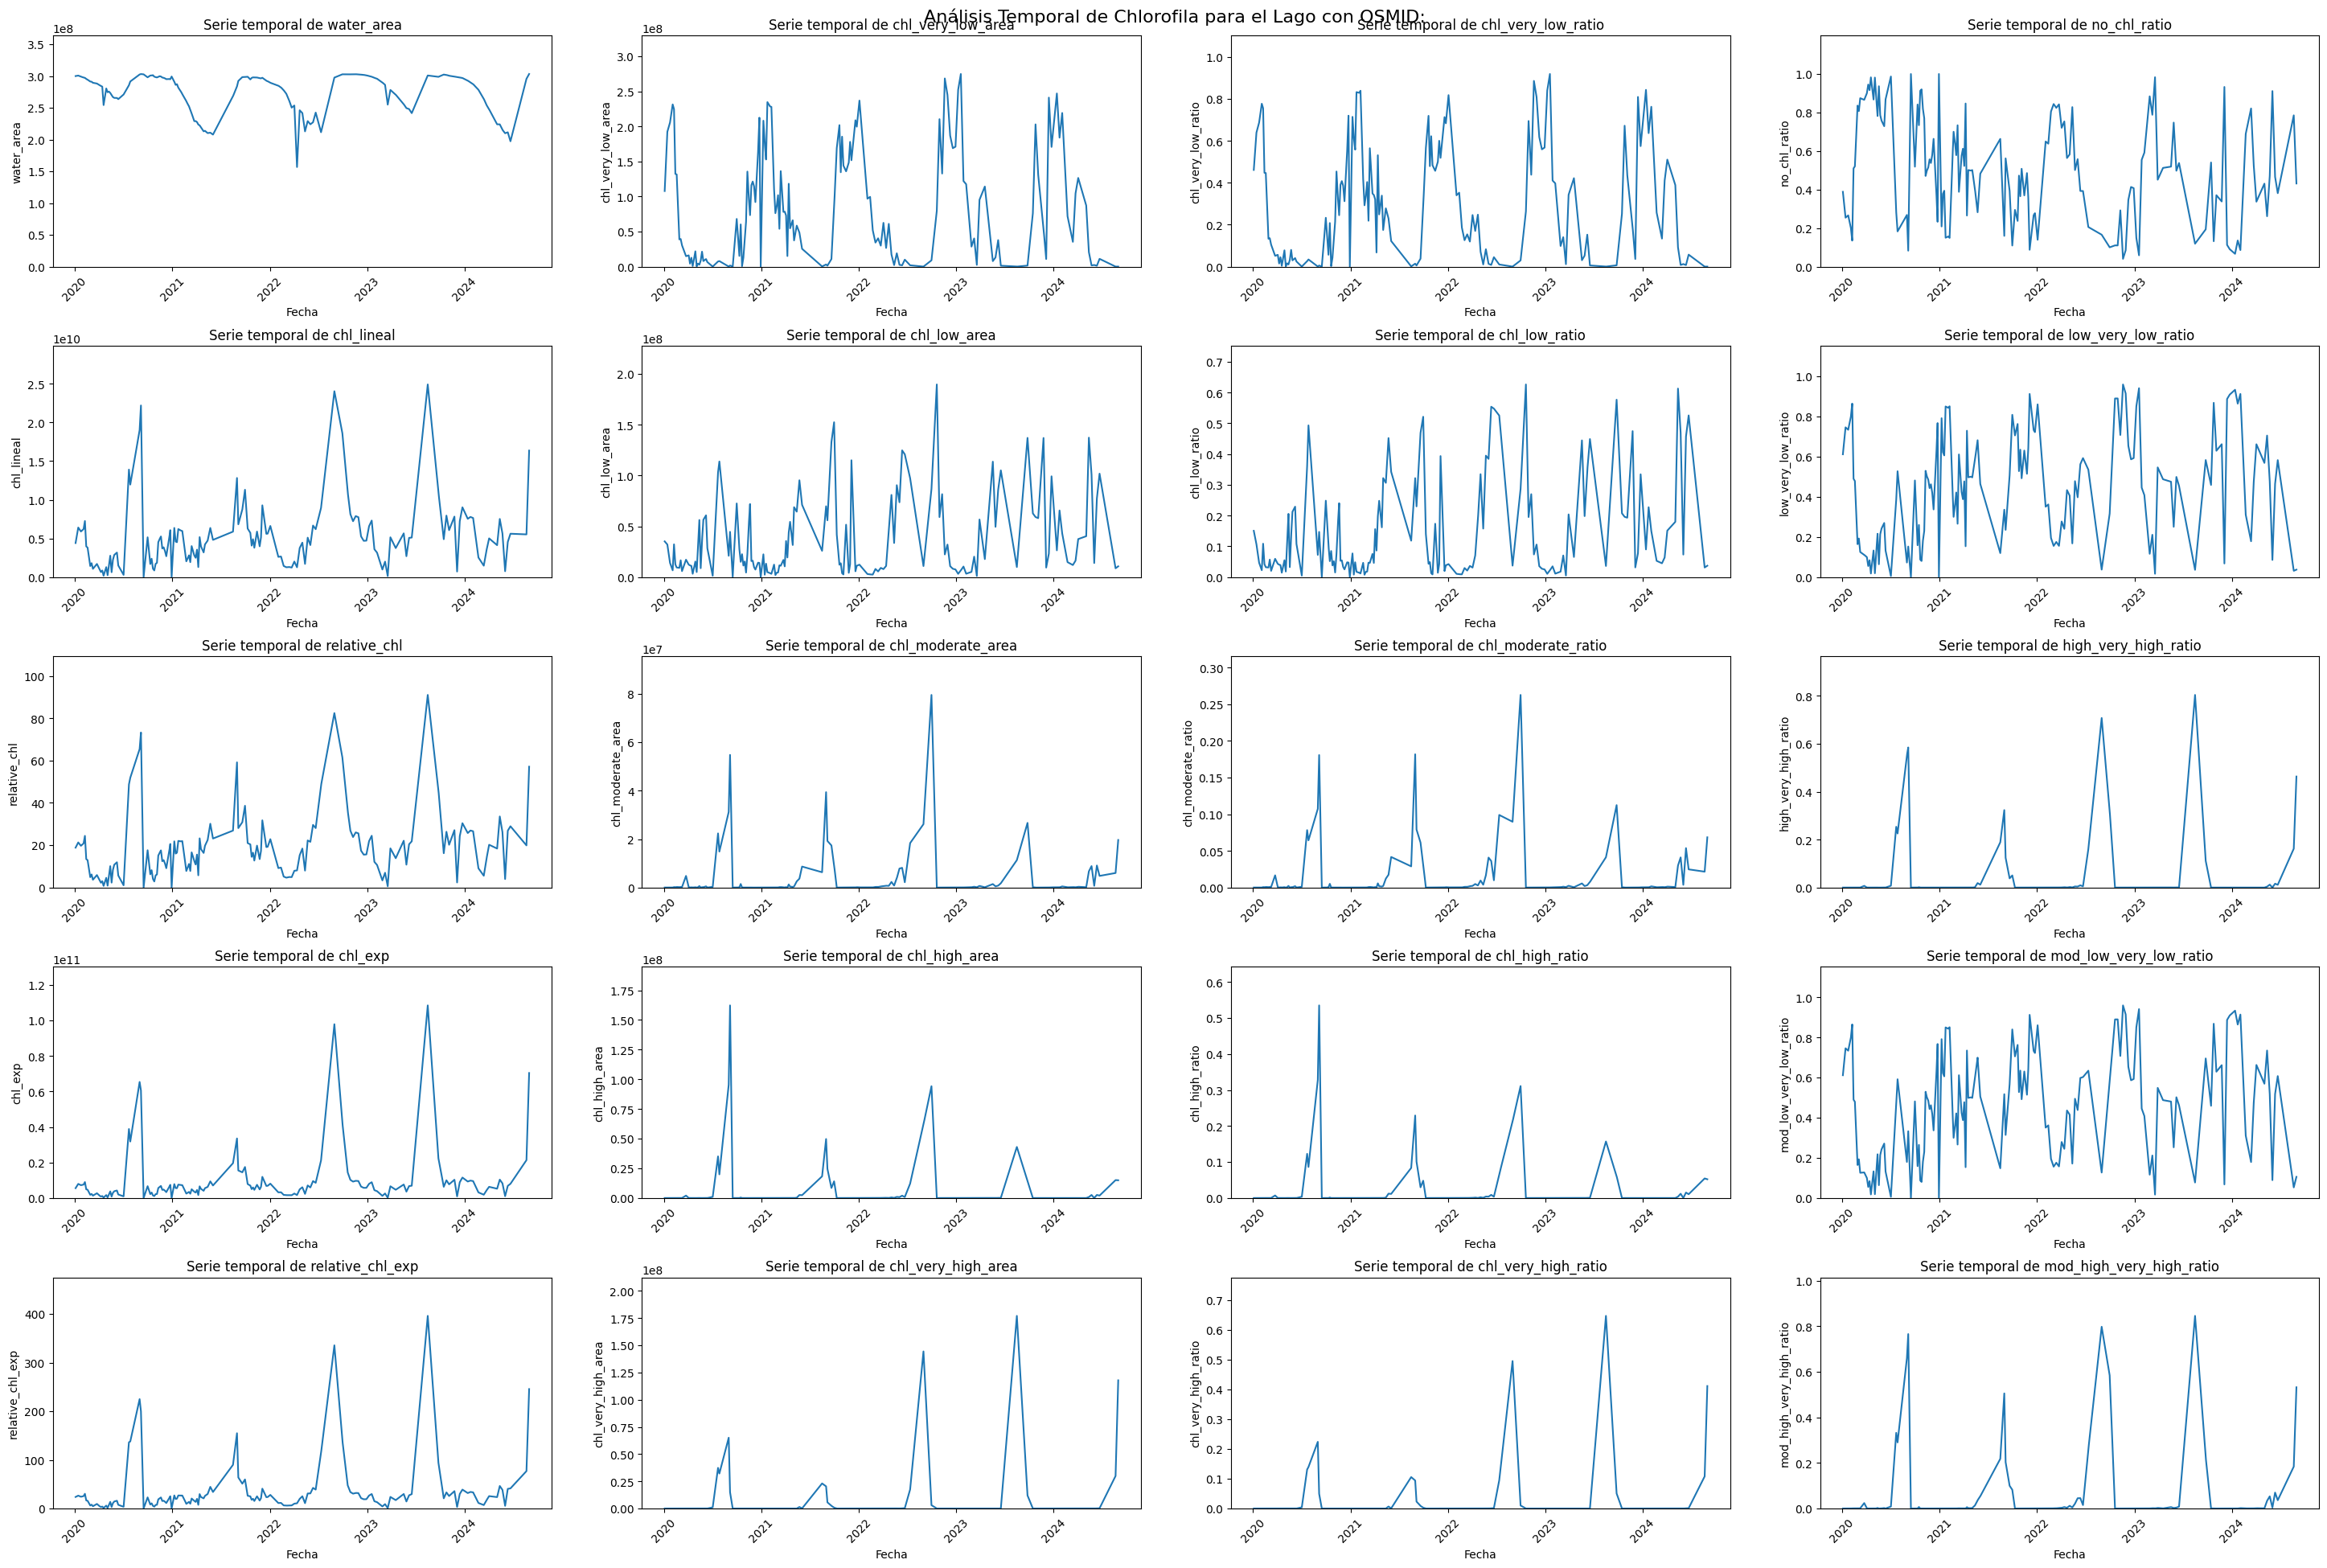

In [42]:
no_clouds_logs.loc[:,"relative_chl"] = no_clouds_logs["chl_lineal"]/no_clouds_logs["water_with_no_clouds_area"]
no_clouds_logs.loc[:, 'relative_chl_exp'] = no_clouds_logs["chl_exp"]/no_clouds_logs["water_with_no_clouds_area"]
no_clouds_logs.loc[:, 'chl_very_low_ratio'] = no_clouds_logs['chl_very_low_area'] / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'chl_low_ratio'] = no_clouds_logs['chl_low_area'] / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'chl_moderate_ratio'] = no_clouds_logs['chl_moderate_area'] / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'chl_high_ratio'] = no_clouds_logs['chl_high_area'] / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'chl_very_high_ratio'] = no_clouds_logs['chl_very_high_area'] / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'chl_high_very_high_area'] = no_clouds_logs['chl_very_high_area'] + no_clouds_logs['chl_high_area']
no_clouds_logs.loc[:, 'no_chl_ratio'] = no_clouds_logs['no_chl_area'] / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'low_very_low_ratio'] = (no_clouds_logs['chl_very_low_area'] + no_clouds_logs['chl_low_area']) / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'high_very_high_ratio'] = (no_clouds_logs['chl_very_high_area'] + no_clouds_logs['chl_high_area']) / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'mod_low_very_low_ratio'] = (no_clouds_logs['chl_very_low_area'] + no_clouds_logs['chl_low_area'] + no_clouds_logs['chl_moderate_area']) / no_clouds_logs['water_with_no_clouds_area']
no_clouds_logs.loc[:, 'mod_high_very_high_ratio'] = (no_clouds_logs['chl_very_high_area'] + no_clouds_logs['chl_high_area'] + no_clouds_logs['chl_moderate_area']) / no_clouds_logs['water_with_no_clouds_area']
logs_filtered = no_clouds_logs[['osmid', 'day', 'chl_lineal', 'relative_chl', 'chl_exp', 'relative_chl_exp', 'water_area', 'cloud_area',
                                'chl_very_low_area', 'chl_low_area', 'chl_moderate_area', 'chl_high_area',
                                'chl_very_high_area', 'chl_very_low_ratio', 'chl_low_ratio', 'chl_moderate_ratio',
                                'chl_high_ratio', 'chl_very_high_ratio', 'no_chl_ratio', 'low_very_low_ratio', 'chl_high_very_high_area', 'high_very_high_ratio', 'mod_low_very_low_ratio','mod_high_very_high_ratio']].copy()


logs_filtered.set_index('day', inplace=True)
print(len(logs_filtered))

# Crear un rango de fechas igualmente espaciadas (por ejemplo, cada día) entre el mínimo y el máximo de 'day'
all_days = pd.date_range(start=logs_filtered.index.min(), end=logs_filtered.index.max(), freq='D')

logs_reindexed = logs_filtered.reindex(all_days)

cols_to_interpolate = ['chl_lineal', 'relative_chl', 'chl_exp', 'relative_chl_exp', 'water_area',
                        'chl_very_low_area', 'chl_low_area', 'chl_moderate_area', 'chl_high_area',
                        'chl_very_high_area', 'chl_very_low_ratio', 'chl_low_ratio', 'chl_moderate_ratio',
                        'chl_high_ratio', 'chl_very_high_ratio', 'no_chl_ratio', 'low_very_low_ratio', 'chl_high_very_high_area', 'high_very_high_ratio', 'mod_low_very_low_ratio','mod_high_very_high_ratio']

logs_reindexed[cols_to_interpolate] = logs_reindexed[cols_to_interpolate].interpolate(method='linear')

# Reiniciar el índice para tener la columna 'day' de nuevo
logs_reindexed.reset_index(inplace=True)
logs_reindexed.rename(columns={'index': 'day'}, inplace=True)


fig, axes = plt.subplots(5, 4, figsize=(30, 20))
fig.tight_layout(pad=5.0)  # Ajuste de los espacios entre subplots


fig.suptitle(f'Análisis Temporal de Chlorofila para el Lago con OSMID: ', fontsize=16)
# Definir las columnas a graficar
columns_to_plot = ['water_area', 'chl_lineal', 'relative_chl', 'chl_exp', 'relative_chl_exp', 'chl_very_low_area', 'chl_low_area', 'chl_moderate_area', 'chl_high_area', 
                    'chl_very_high_area', 
                    'chl_very_low_ratio', 'chl_low_ratio', 'chl_moderate_ratio', 'chl_high_ratio', 'chl_very_high_ratio', 'no_chl_ratio', 'low_very_low_ratio', 'high_very_high_ratio', 'mod_low_very_low_ratio','mod_high_very_high_ratio']

# Graficar cada columna en un subplot
for i, col in enumerate(columns_to_plot):
    ax = axes[i % 5 ,i // 5]  # Ubicación en la matriz de subplots (5 filas, 3 columnas)
    ax.plot(logs_reindexed['day'], logs_reindexed[col])
    ax.set_title(f'Serie temporal de {col}', fontsize=12)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(col)
    ax.set_ylim((0, 1.2*max(logs_reindexed[col])))
    ax.tick_params(axis='x', rotation=45)

# Mostrar el gráfico
plt.show()


C:\Users\agand\AppData\Local\Temp\ipykernel_31688\1750795890.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


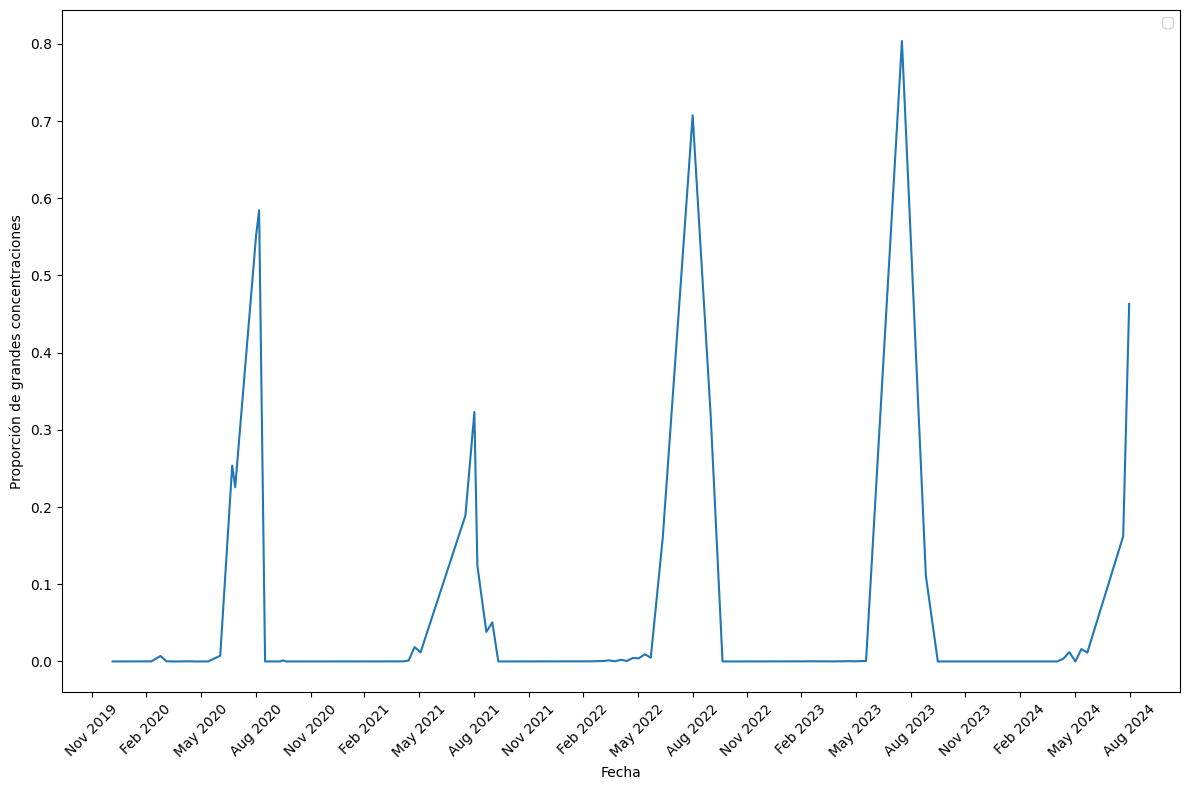

In [45]:
import matplotlib.dates as mdates
plt.figure(figsize=(12, 8))

# Lista de variables a graficar
variables = ['high_very_high_ratio']

# # Iterar sobre cada variable para agregar una línea al gráfico
# nombres_leyenda = ['Altas y muy altas \nconcentraciones', 'Agua']

# Iterar sobre cada variable para agregar una línea al gráfico
for i, variable in enumerate(variables):
    plt.plot(logs_reindexed['day'], logs_reindexed[variable])

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=-1, interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Añadir título y etiquetas
plt.xlabel("Fecha")
plt.ylabel("Proporción de grandes concentraciones")
# plt.ylim(0,1)
plt.legend()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Análisis espacial

In [40]:
def plot_spatial_analysis(logs):
    n = len(logs)
    
    
def get_all_transformed_images(logs, resolution = 25):
    transformed_images = []
    for i, row in logs.iterrows():
        if (i%10==0):
            print(i)
        day = row['day']
        transformed_image = utils.get_transformed_image(16288976, day, resolution)
        transformed_images.append(transformed_image)

    return transformed_images

# transformed_images = get_all_transformed_images(no_clouds_logs)

In [41]:
no_clouds_logs['year_month'] = no_clouds_logs['day'].dt.to_period('M')

# Para cada mes, selecciona la fila con el valor máximo de 'chl_lineal'
df_max_chl = no_clouds_logs.loc[no_clouds_logs.groupby('year_month')['chl_lineal'].idxmax()]

# Si no quieres la columna auxiliar 'year_month', la puedes eliminar
df_max_chl = df_max_chl.drop(columns=['year_month'])



In [45]:
transformed_images = get_all_transformed_images(df_max_chl, resolution=25)

2630
2590
2690
2700
2500
2470
2550


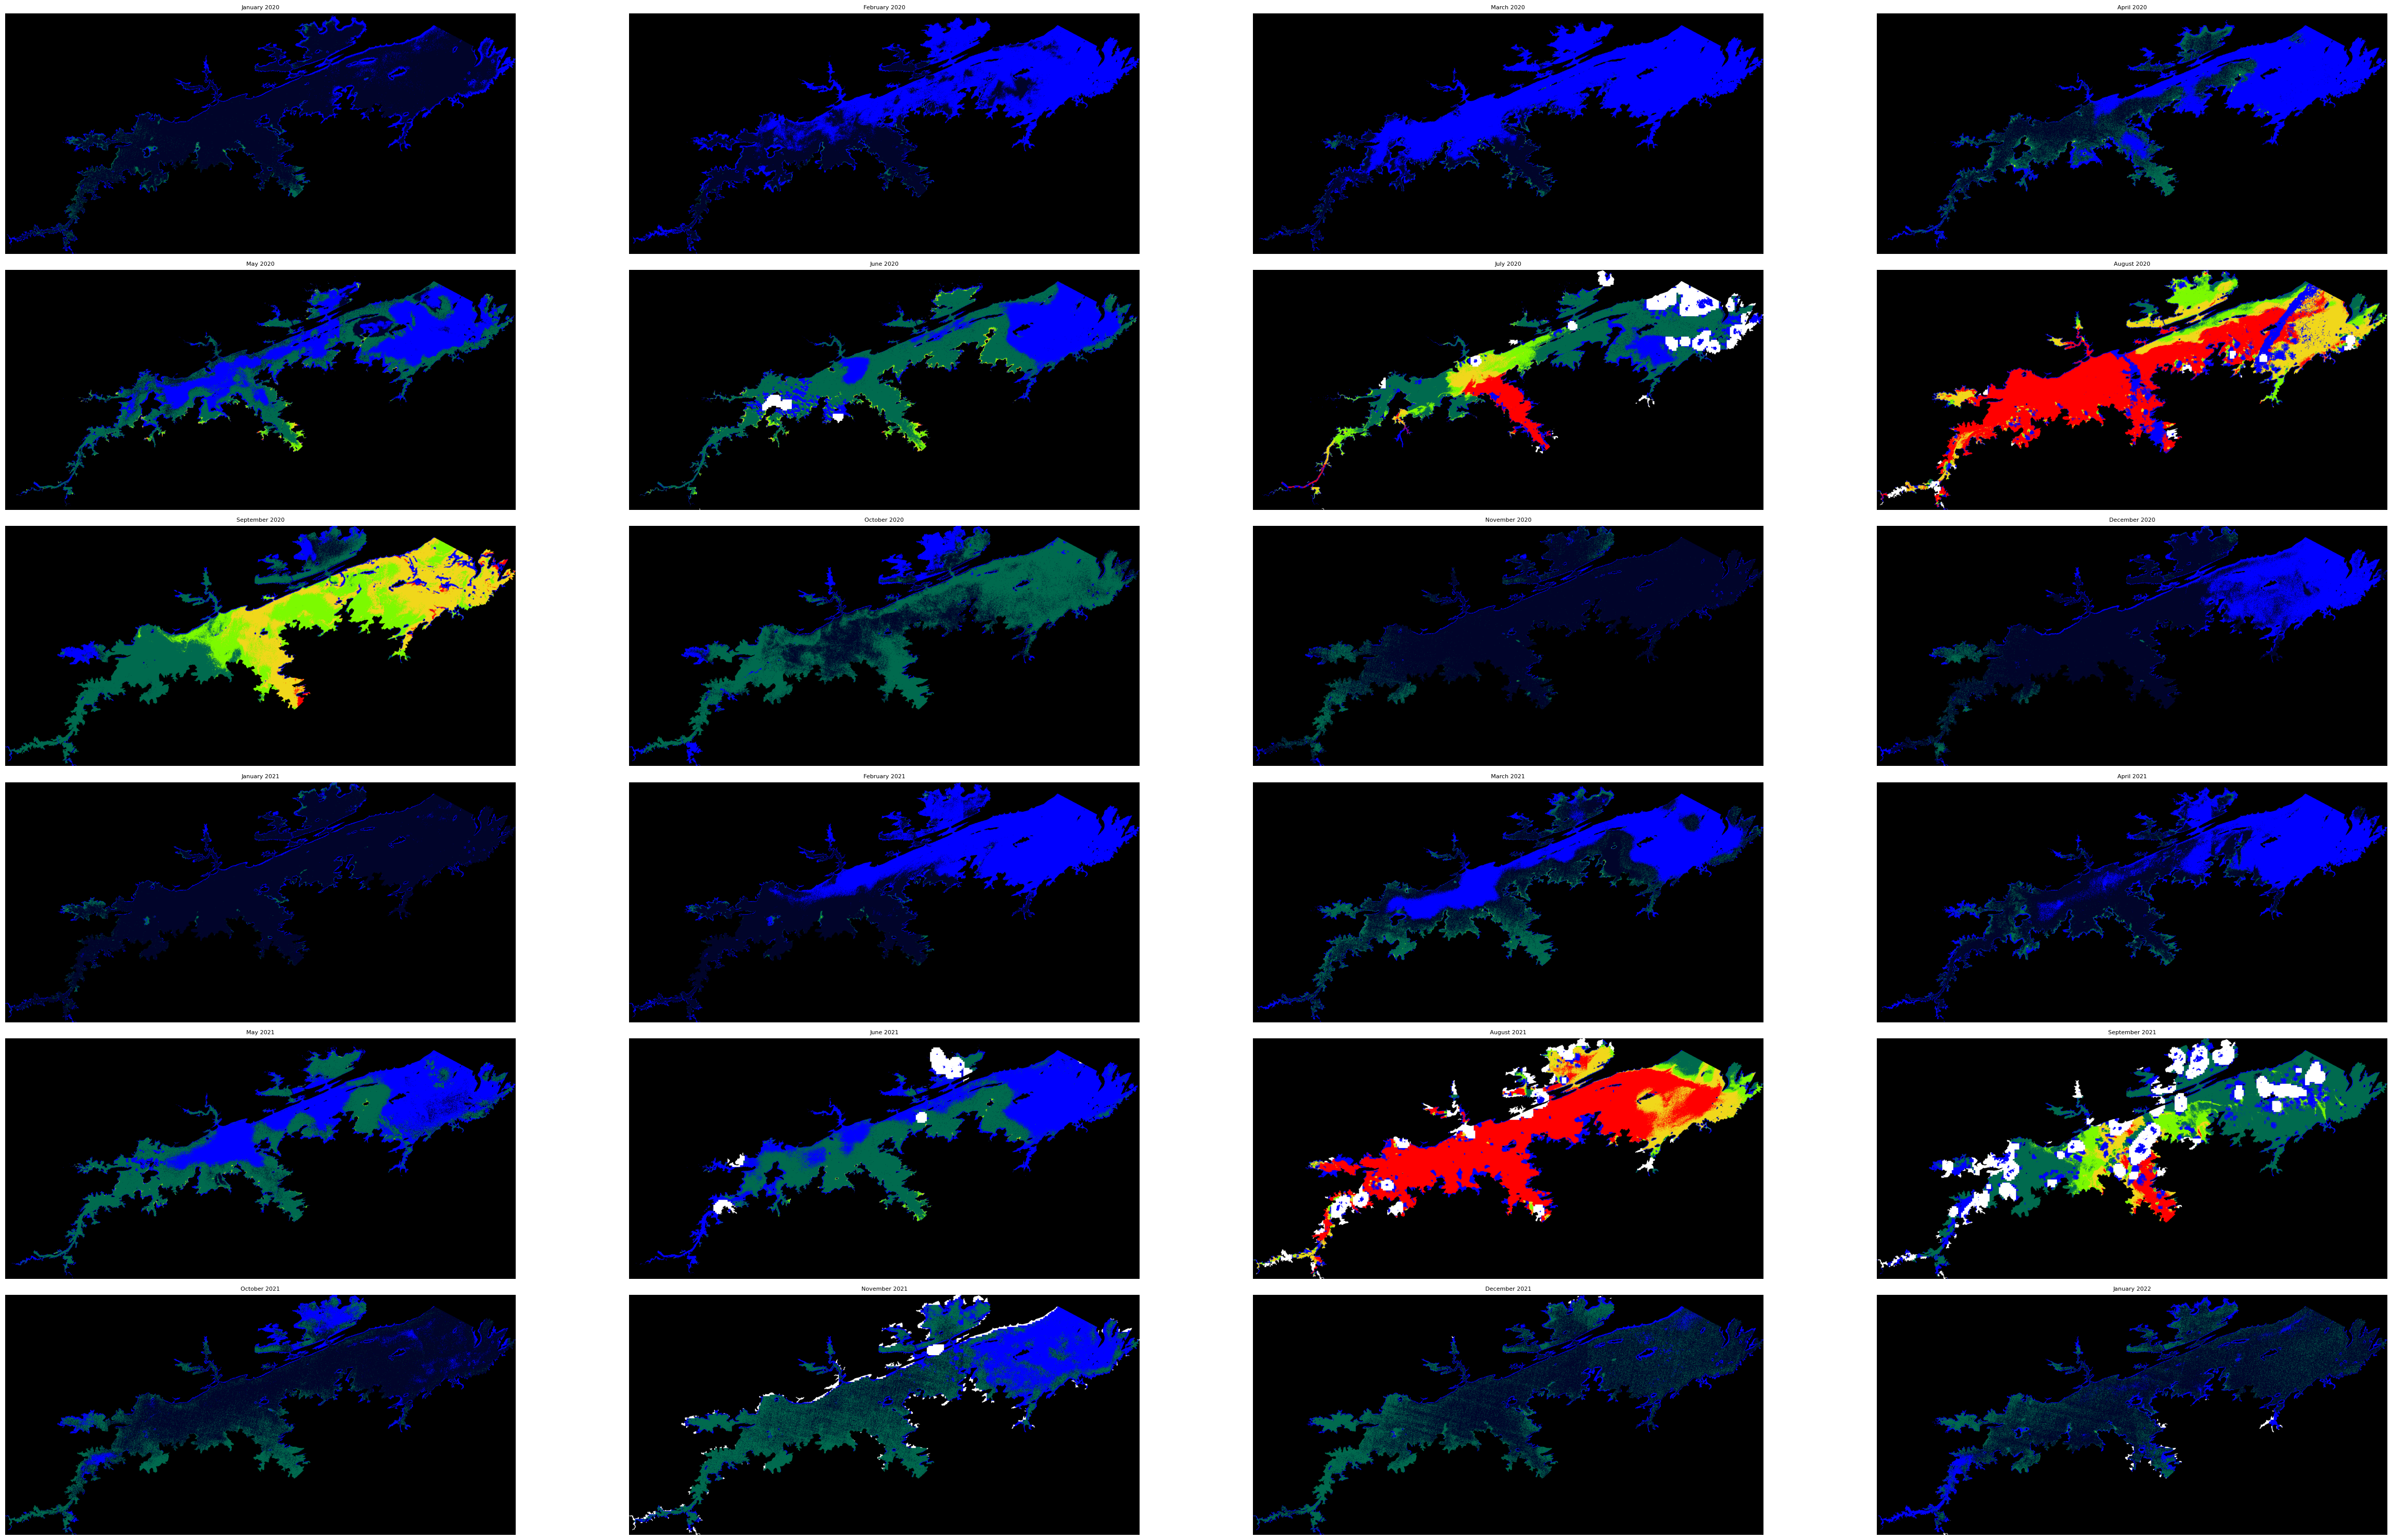

In [48]:

fig, axs = plt.subplots(6, 4, figsize=(50, 30))

for i, (image, ax) in enumerate(zip(transformed_images[23:47], axs.flat)):
    ax.imshow(image)
    
    
    row = df_max_chl.iloc[i]
    day = row['day']
    month_year_label = day.strftime('%B %Y') 
    
    ax.set_title(month_year_label, fontsize=8)
    
    ax.axis('off')

plt.tight_layout()

plt.show()

In [141]:
def plot_lake_variations(logs, resolution=25):
    maximum_water_image = None
    for i, row in logs.iterrows():
        if (i%10==0):
            print(i)
        day = row['day']
        transformed_image = utils.get_transformed_image(16288976, day, resolution)
        white_pixels_mask = np.all(transformed_image[:, :, :3] == [255, 255, 255], axis=-1)
        black_pixels_mask = np.all(transformed_image[:, :, :3] == [0, 0, 0], axis=-1)
        water_pixels_mask  = ~white_pixels_mask & ~black_pixels_mask
        if maximum_water_image is None:
            print(transformed_image.shape)
            maximum_water_image = np.zeros_like(transformed_image.shape, dtype=transformed_image.dtype)
            print(maximum_water_image.shape)
        maximum_water_image[water_pixels_mask] = [0, 0, 255]
        maximum_water_image.shpae

    utils.plot_image(maximum_water_image)
    

In [142]:
plot_lake_variations(no_clouds_logs)

(980, 2083, 3)
(3,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [54]:
image = utils.get_image_from_lake(16288976, 'true', datetime(2020, 3, 4), 25)

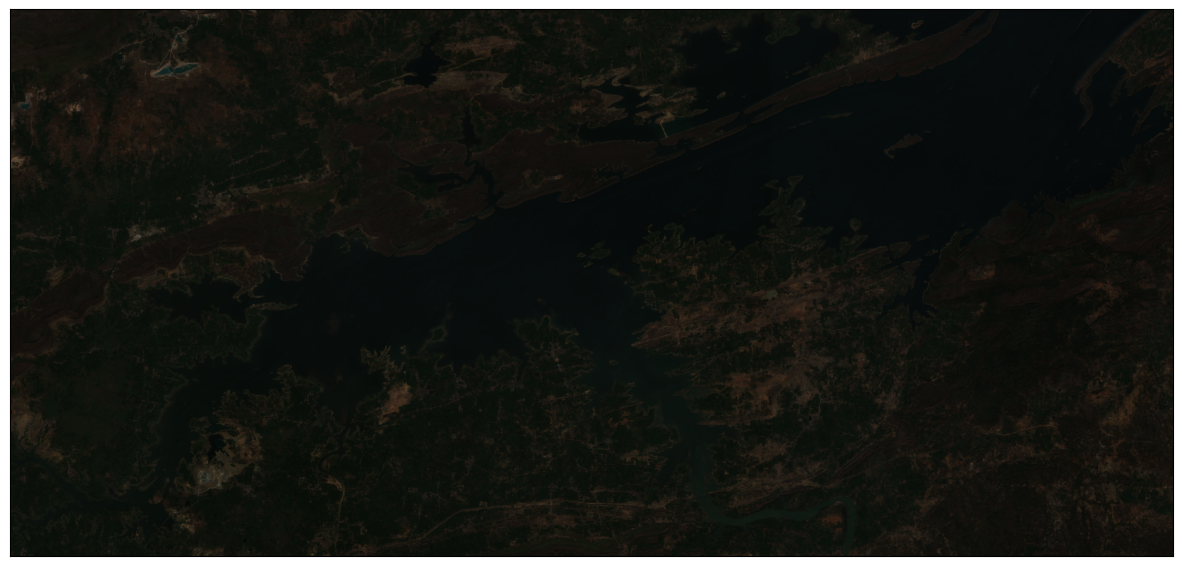

In [55]:
utils.plot_image(image)

In [79]:
water_df

day   water_area
2614 2020-01-14  300753125.0
2616 2020-01-24  299093125.0
2618 2020-02-03  297673750.0
2620 2020-02-13  295469375.0
2621 2020-02-18  294330625.0
...         ...          ...
2518 2024-03-23  254622500.0
2519 2024-04-02  247678125.0
2522 2024-05-02  224026875.0
2523 2024-05-12  223950625.0
2524 2024-05-22  215378750.0

[100 rows x 2 columns]

In [64]:
all_saved_logs = pd.read_csv(r"../data/all_saved_logs.csv")
all_saved_logs["day"] = pd.to_datetime(all_saved_logs["day"], format='%Y-%m-%d')
lake_logs = all_saved_logs[(all_saved_logs['osmid'] == str(16288976))
                           & (all_saved_logs['exists_true_image'] == True)
                           & (all_saved_logs['water_area'] > 50000000)].sort_values(by='day').copy()
lake_logs = utils.calculate_chl(lake_logs)
lake_logs = utils.calculate_chl(lake_logs, 'exp')

lake_logs['month'] = lake_logs['day'].dt.to_period('M')

# Calcular el valor mínimo de 'cloud_area' para cada mes
min_cloud_area_por_mes = lake_logs.groupby('month')['cloud_area'].min().reset_index()

# Renombrar la columna del mínimo para hacer un merge más claro
min_cloud_area_por_mes.rename(columns={'cloud_area': 'min_cloud_area'}, inplace=True)

# Hacer merge con el DataFrame original para agregar la columna de mínimos
lake_logs = pd.merge(lake_logs, min_cloud_area_por_mes, on='month', how='left')

no_clouds_logs = lake_logs[((lake_logs["cloud_area"] < 0.15 * lake_logs["water_area"]) | (lake_logs['cloud_area'] == lake_logs['min_cloud_area'])) & (lake_logs['min_cloud_area']<0.4*max(lake_logs["water_area"]))].copy()
no_clouds_logs.loc[:,"relative_chl"] = no_clouds_logs["chl_lineal"]/no_clouds_logs["water_area"]
no_clouds_logs.loc[:, 'relative_chl_exp'] = no_clouds_logs["chl_exp"]/no_clouds_logs["water_area"]
no_clouds_logs.loc[:, 'chl_very_low_ratio'] = no_clouds_logs['chl_very_low_area'] / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'chl_low_ratio'] = no_clouds_logs['chl_low_area'] / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'chl_moderate_ratio'] = no_clouds_logs['chl_moderate_area'] / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'chl_high_ratio'] = no_clouds_logs['chl_high_area'] / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'chl_very_high_ratio'] = no_clouds_logs['chl_very_high_area'] / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'no_chl_ratio'] = no_clouds_logs['no_chl_area'] / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'low_very_low_ratio'] = (no_clouds_logs['chl_very_low_area'] + no_clouds_logs['chl_low_area']) / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'high_very_high_ratio'] = (no_clouds_logs['chl_very_high_area'] + no_clouds_logs['chl_high_area']) / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'mod_low_very_low_ratio'] = (no_clouds_logs['chl_very_low_area'] + no_clouds_logs['chl_low_area'] + no_clouds_logs['chl_moderate_area']) / no_clouds_logs['water_area']
no_clouds_logs.loc[:, 'mod_high_very_high_ratio'] = (no_clouds_logs['chl_very_high_area'] + no_clouds_logs['chl_high_area'] + no_clouds_logs['chl_moderate_area']) / no_clouds_logs['water_area']
ban_sagar_filtered = no_clouds_logs[['osmid', 'day', 'chl_lineal', 'relative_chl', 'chl_exp', 'relative_chl_exp', 'water_area', 'cloud_area',
                                'chl_very_low_area', 'chl_low_area', 'chl_moderate_area', 'chl_high_area',
                                'chl_very_high_area', 'chl_very_low_ratio', 'chl_low_ratio', 'chl_moderate_ratio',
                                'chl_high_ratio', 'chl_very_high_ratio', 'no_chl_ratio', 'low_very_low_ratio', 'high_very_high_ratio', 'mod_low_very_low_ratio','mod_high_very_high_ratio']].copy()

    

In [72]:
lake_logs[(lake_logs['day']>datetime(2021, 5, 1)) & (lake_logs['day']<datetime(2021, 10, 1))]

osmid        day  exists_true_image  total_pixel_area   water_area  \
91   16288976 2021-05-03               True       301224375.0  213776875.0   
92   16288976 2021-05-13               True       301224375.0  210171875.0   
93   16288976 2021-05-23               True       301224375.0  210846250.0   
94   16288976 2021-05-28               True       301224375.0  245235625.0   
95   16288976 2021-06-02               True       301224375.0  207835625.0   
96   16288976 2021-06-07               True       301224375.0  167609375.0   
97   16288976 2021-06-12               True       301224375.0  175083750.0   
98   16288976 2021-06-17               True       301224375.0  166075000.0   
99   16288976 2021-06-22               True       301224375.0  230926875.0   
100  16288976 2021-06-27               True       301224375.0  231778750.0   
101  16288976 2021-07-02               True       301224375.0  192850000.0   
102  16288976 2021-07-07               True       301224375.0  170567500.0   
103  16288976 2021-07-12               True       301224375.0  240880000.0   
104  16288976 2021-07-17               True       301224375.0  182092500.0   
105  16288976 2021-07-22               True       301224375.0  288020000.0   
106  16288976 2021-08-06               True       301224375.0  287971875.0   
107  16288976 2021-08-16               True       301224375.0  268181250.0   
108  16288976 2021-08-21               True       301224375.0  279190000.0   
109  16288976 2021-08-26               True       301224375.0  258913750.0   
110  16288976 2021-08-31               True       301224375.0  283755625.0   
111  16288976 2021-09-05               True       301224375.0  292330625.0   
112  16288976 2021-09-15               True       301224375.0  292828750.0   
113  16288976 2021-09-20               True       301224375.0  298353750.0   
114  16288976 2021-09-25               True       301224375.0  276998125.0   
115  16288976 2021-09-30               True       301224375.0  298521250.0   

      cloud_area  water_with_no_clouds_area  no_chl_area  chl_very_low_area  \
91           0.0                213776875.0  107127500.0         37361250.0   
92           0.0                210171875.0   84510625.0         58458125.0   
93           0.0                210846250.0   59448750.0         48457500.0   
94   227730625.0                 74449375.0   69940625.0                0.0   
95           0.0                207835625.0  100225000.0         25374375.0   
96   269562500.0                 29850000.0   29848125.0                0.0   
97    84155625.0                155748125.0  148852500.0          1405000.0   
98   187130625.0                 82620625.0   61480000.0           415625.0   
99   104776250.0                151056250.0   53711250.0            66250.0   
100  128671250.0                152269375.0  102415000.0          4738750.0   
101  308631250.0                        0.0          0.0                0.0   
102  308210625.0                   420625.0     420625.0                0.0   
103  171572500.0                109088750.0   62505625.0          2979375.0   
104  148786250.0                 90141875.0   31122500.0          3005000.0   
105  215570000.0                 93061250.0   93061250.0                0.0   
106  255938750.0                 52260000.0   52260000.0                0.0   
107   63235625.0                218513750.0  144810000.0           235625.0   
108  113333750.0                176619375.0   52620625.0          1535000.0   
109  308631250.0                        0.0          0.0                0.0   
110   73768750.0                216744375.0   34550000.0          3023750.0   
111   55971875.0                243154375.0  136541250.0          1305000.0   
112  308631250.0                        0.0          0.0                0.0   
113   17078750.0                283541250.0  111582500.0         10741875.0   
114  308631250.0                        0.0          0.0                0.0   
115 

In [67]:
ban_sagar_filtered

osmid        day    chl_lineal  relative_chl       chl_exp  \
2    16288976 2020-01-14  6.410129e+09     21.313592  7.950641e+09   
4    16288976 2020-01-24  5.897569e+09     19.718170  7.222459e+09   
6    16288976 2020-02-03  6.209606e+09     20.860441  7.555359e+09   
7    16288976 2020-02-08  7.252999e+09     24.410905  8.980011e+09   
8    16288976 2020-02-13  3.964563e+09     13.417846  4.879101e+09   
..        ...        ...           ...           ...           ...   
208  16288976 2024-05-22  5.637417e+09     26.174433  8.249025e+09   
209  16288976 2024-06-01  7.564970e+08      3.603407  1.031861e+09   
211  16288976 2024-06-21  5.608537e+09     28.426081  8.006781e+09   
215  16288976 2024-08-20  5.522249e+09     18.678766  2.133029e+10   
216  16288976 2024-08-30  1.637147e+10     53.982811  7.039277e+10   

     relative_chl_exp   water_area  cloud_area  chl_very_low_area  \
2           26.435770  300753125.0         0.0        192343750.0   
4           24.147862  299093125.0         0.0        205591250.0   
6           25.381341  297673750.0         0.0        231403125.0   
7           30.223389  297121250.0      5000.0        224631875.0   
8           16.513050  295469375.0         0.0        132252500.0   
..                ...          ...         ...                ...   
208         38.300086  215378750.0         0.0          1693750.0   
209          4.915043  209939375.0  26950000.0          2288125.0   
211         40.581246  197302500.0  10739375.0         11047500.0   
215         72.148782  295643125.0  21490625.0            15000.0   
216        232.111096  303271875.0  17234375.0             8125.0   

     chl_low_area  ...  chl_very_low_ratio  chl_low_ratio  chl_moderate_ratio  \
2      32056250.0  ...            0.639540       0.106587            0.000031   
4      13950625.0  ...            0.687382       0.046643            0.000123   
6       6621875.0  ...            0.777372       0.022245            0.000084   
7      32229375.0  ...            0.756028       0.108472            0.000602   
8      12435625.0  ...            0.447601       0.042088            0.000457   
..            ...  ...                 ...            ...                 ...   
208   100917500.0  ...            0.007864       0.468558            0.041128   
209    13800625.0  ...            0.010899       0.065736            0.003331   
211   101850000.0  ...            0.055993       0.516212            0.024350   
215     8638125.0  ...            0.000051       0.029218            0.020307   
216    10586875.0  ...            0.000027       0.034909            0.064775   

     chl_high_ratio  chl_very_high_ratio  no_chl_ratio  low_very_low_ratio  \
2          0.000000             0.000000      0.253842            0.746127   
4          0.000002             0.000000      0.265849            0.734025   
6          0.000004             0.000000      0.200295            0.799617   
7          0.000015             0.000000      0.134873            0.864500   
8          0.000011             0.000000      0.509843            0.489689   
..              ...                  ...           ...                 ...   
208        0.011912             0.000232      0.470305            0.476422   
209        0.000039             0.000000      0.818293            0.076635   
211        0.010330             0.000922      0.374051            0.572205   
215        0.051031             0.101114      0.736530            0.029269   
216        0.049281             0.388614      0.407720            0.034936   

     high_very_high_ratio  mod_low_very_low_ratio  mod_high_very_high_ratio  
2                0.000000                0.746158                  0.000031  
4                0.000002                0.734148                  0.000125  
6                0.000004                0.799701                  0.000088  
7                0.000015                0.865101                  0.000616  
8                0.000011             

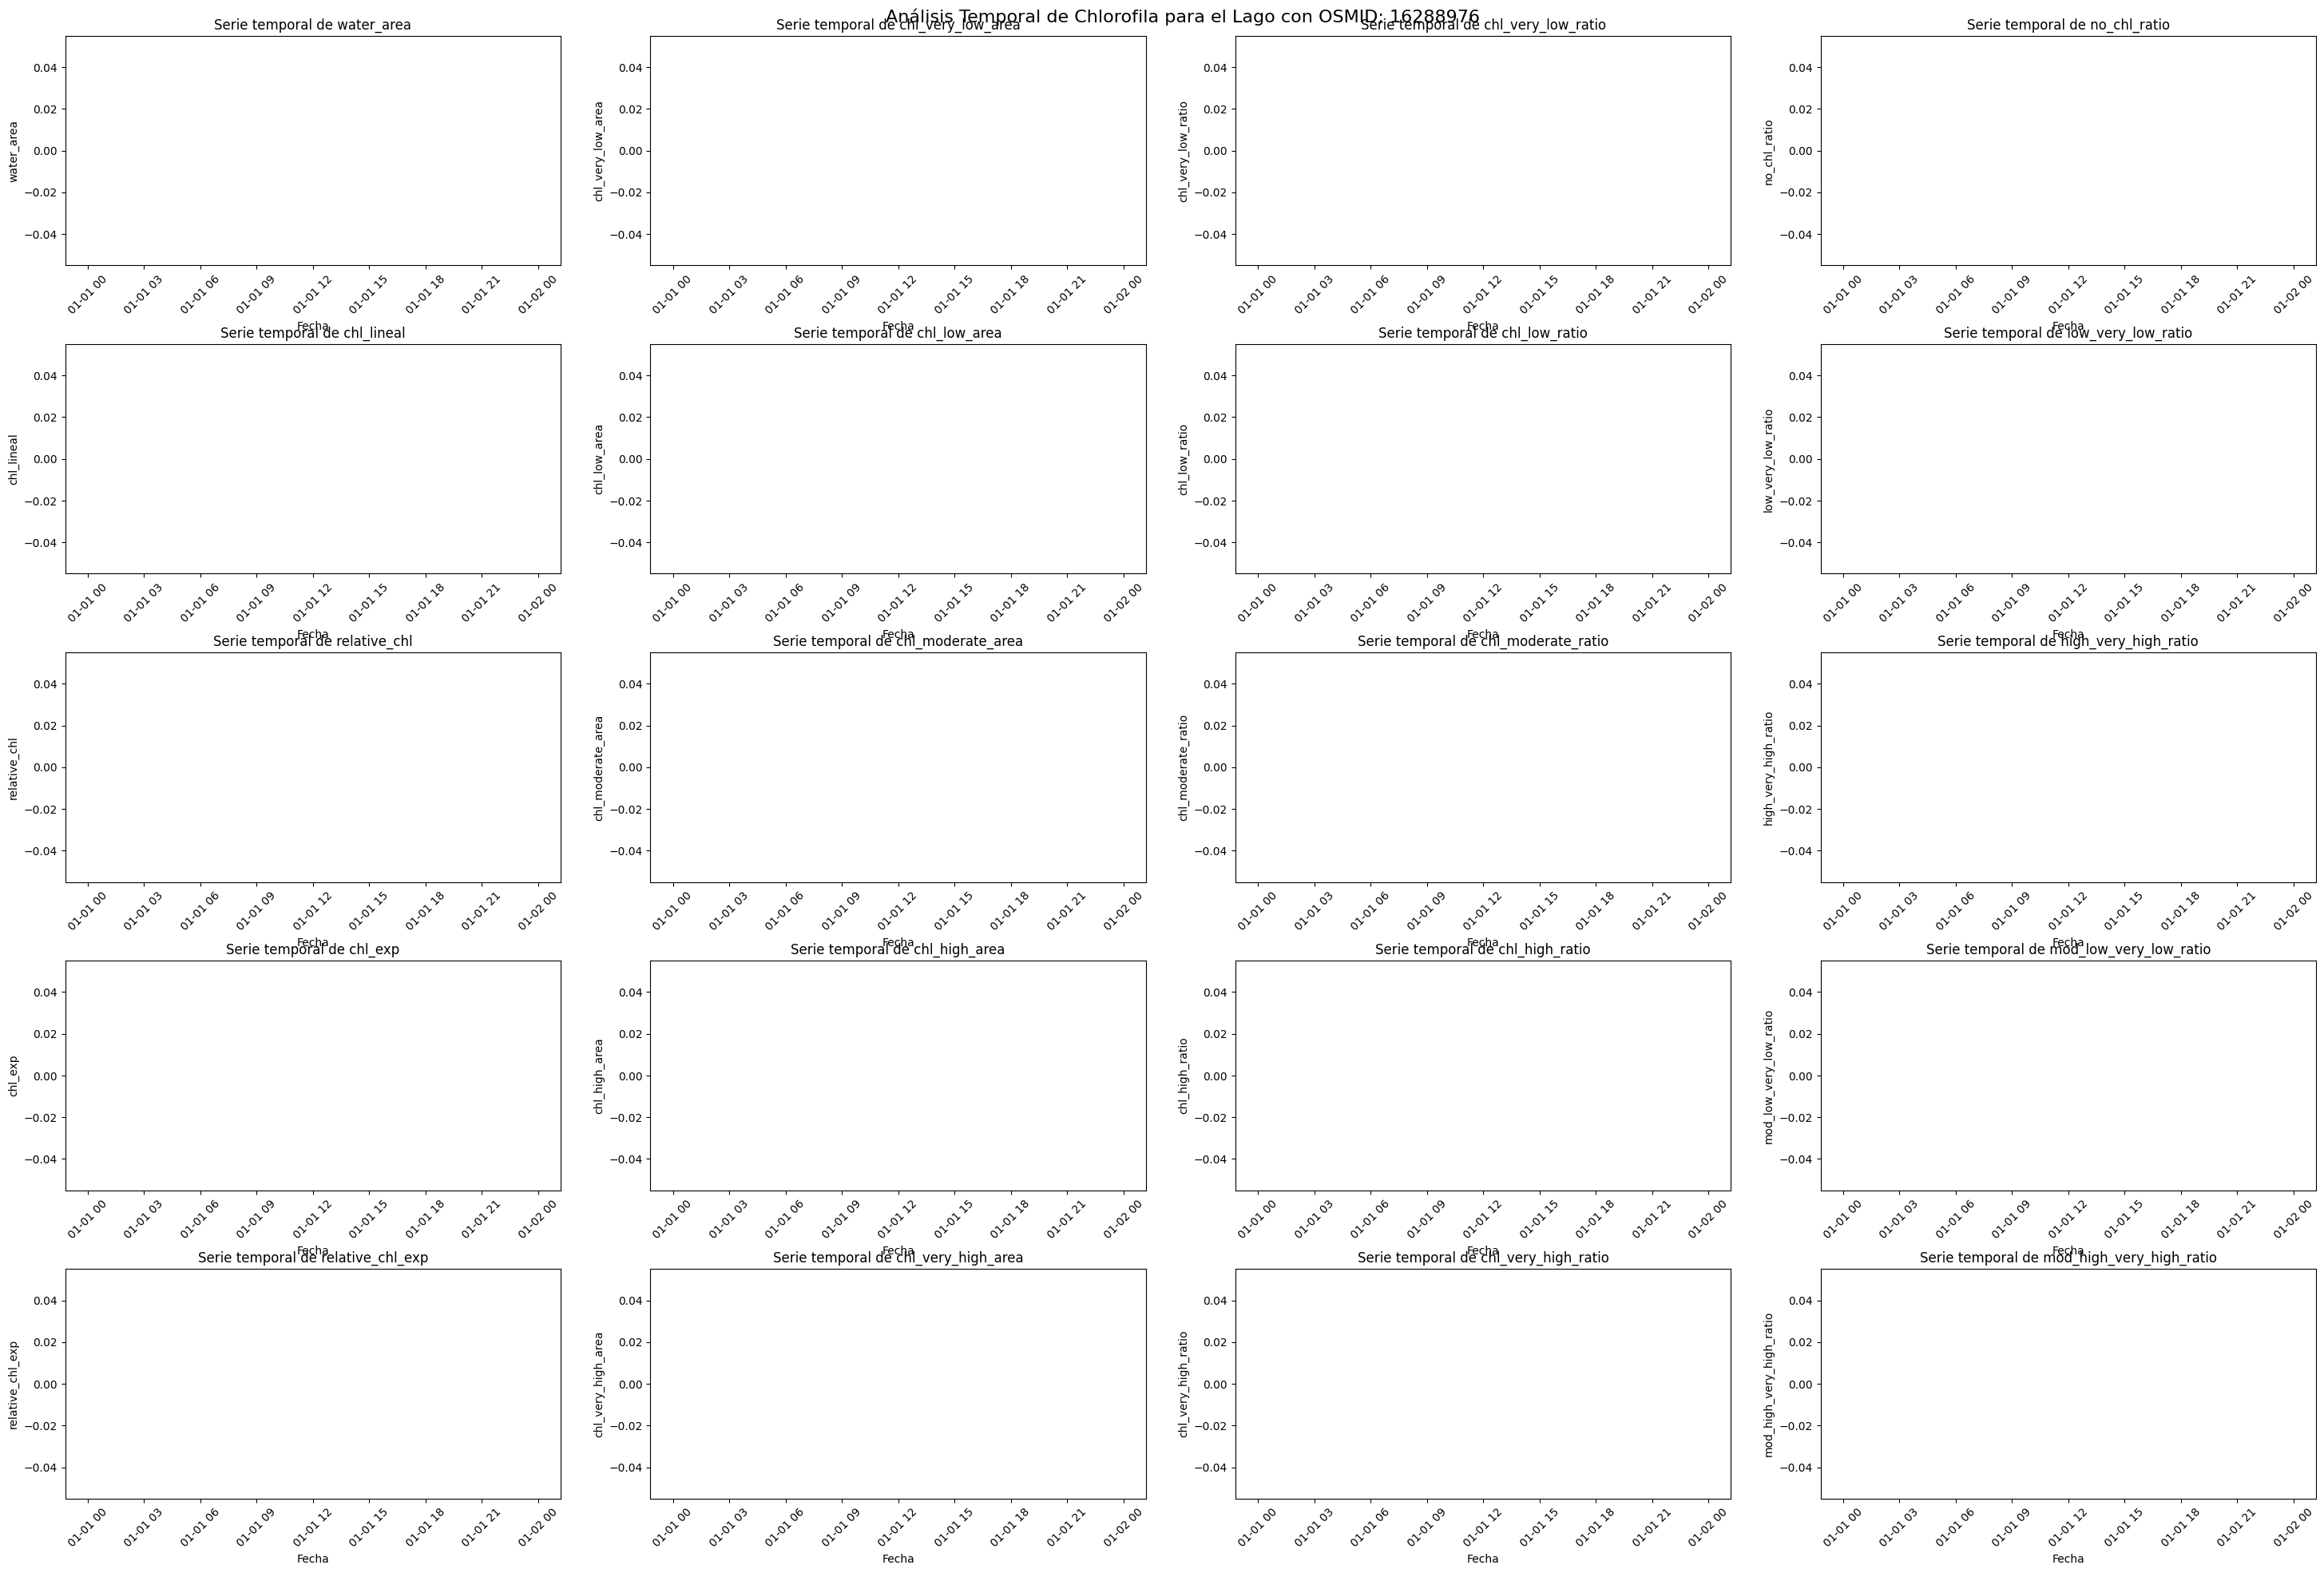

In [68]:
import matplotlib.pyplot as plt
all_days = pd.date_range(start=ban_sagar_filtered.index.min(), end=ban_sagar_filtered.index.max(), freq='D')

logs_reindexed = ban_sagar_filtered.reindex(all_days)

cols_to_interpolate = ['chl_lineal', 'relative_chl', 'chl_exp', 'relative_chl_exp', 'water_area',
                        'chl_very_low_area', 'chl_low_area', 'chl_moderate_area', 'chl_high_area',
                        'chl_very_high_area', 'chl_very_low_ratio', 'chl_low_ratio', 'chl_moderate_ratio',
                        'chl_high_ratio', 'chl_very_high_ratio', 'no_chl_ratio', 'low_very_low_ratio', 'high_very_high_ratio', 'mod_low_very_low_ratio','mod_high_very_high_ratio']

logs_reindexed[cols_to_interpolate] = logs_reindexed[cols_to_interpolate].interpolate(method='linear')

# Reiniciar el índice para tener la columna 'day' de nuevo
logs_reindexed.reset_index(inplace=True)
logs_reindexed.rename(columns={'index': 'day'}, inplace=True)


fig, axes = plt.subplots(5, 4, figsize=(30, 20))
fig.tight_layout(pad=5.0)  # Ajuste de los espacios entre subplots


fig.suptitle(f'Análisis Temporal de Chlorofila para el Lago con OSMID: 16288976', fontsize=16)
# Definir las columnas a graficar
columns_to_plot = ['water_area', 'chl_lineal', 'relative_chl', 'chl_exp', 'relative_chl_exp', 'chl_very_low_area', 'chl_low_area', 'chl_moderate_area', 'chl_high_area', 
                    'chl_very_high_area', 
                    'chl_very_low_ratio', 'chl_low_ratio', 'chl_moderate_ratio', 'chl_high_ratio', 'chl_very_high_ratio', 'no_chl_ratio', 'low_very_low_ratio', 'high_very_high_ratio', 'mod_low_very_low_ratio','mod_high_very_high_ratio']

# Graficar cada columna en un subplot
for i, col in enumerate(columns_to_plot):
    ax = axes[i % 5 ,i // 5]  # Ubicación en la matriz de subplots (5 filas, 3 columnas)
    ax.plot(logs_reindexed['day'], logs_reindexed[col])
    ax.set_title(f'Serie temporal de {col}', fontsize=12)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(col)
    # ax.set_ylim((0, 1.2*max(logs_reindexed[col])))
    ax.tick_params(axis='x', rotation=45)

# Mostrar el gráfico
plt.show()

140


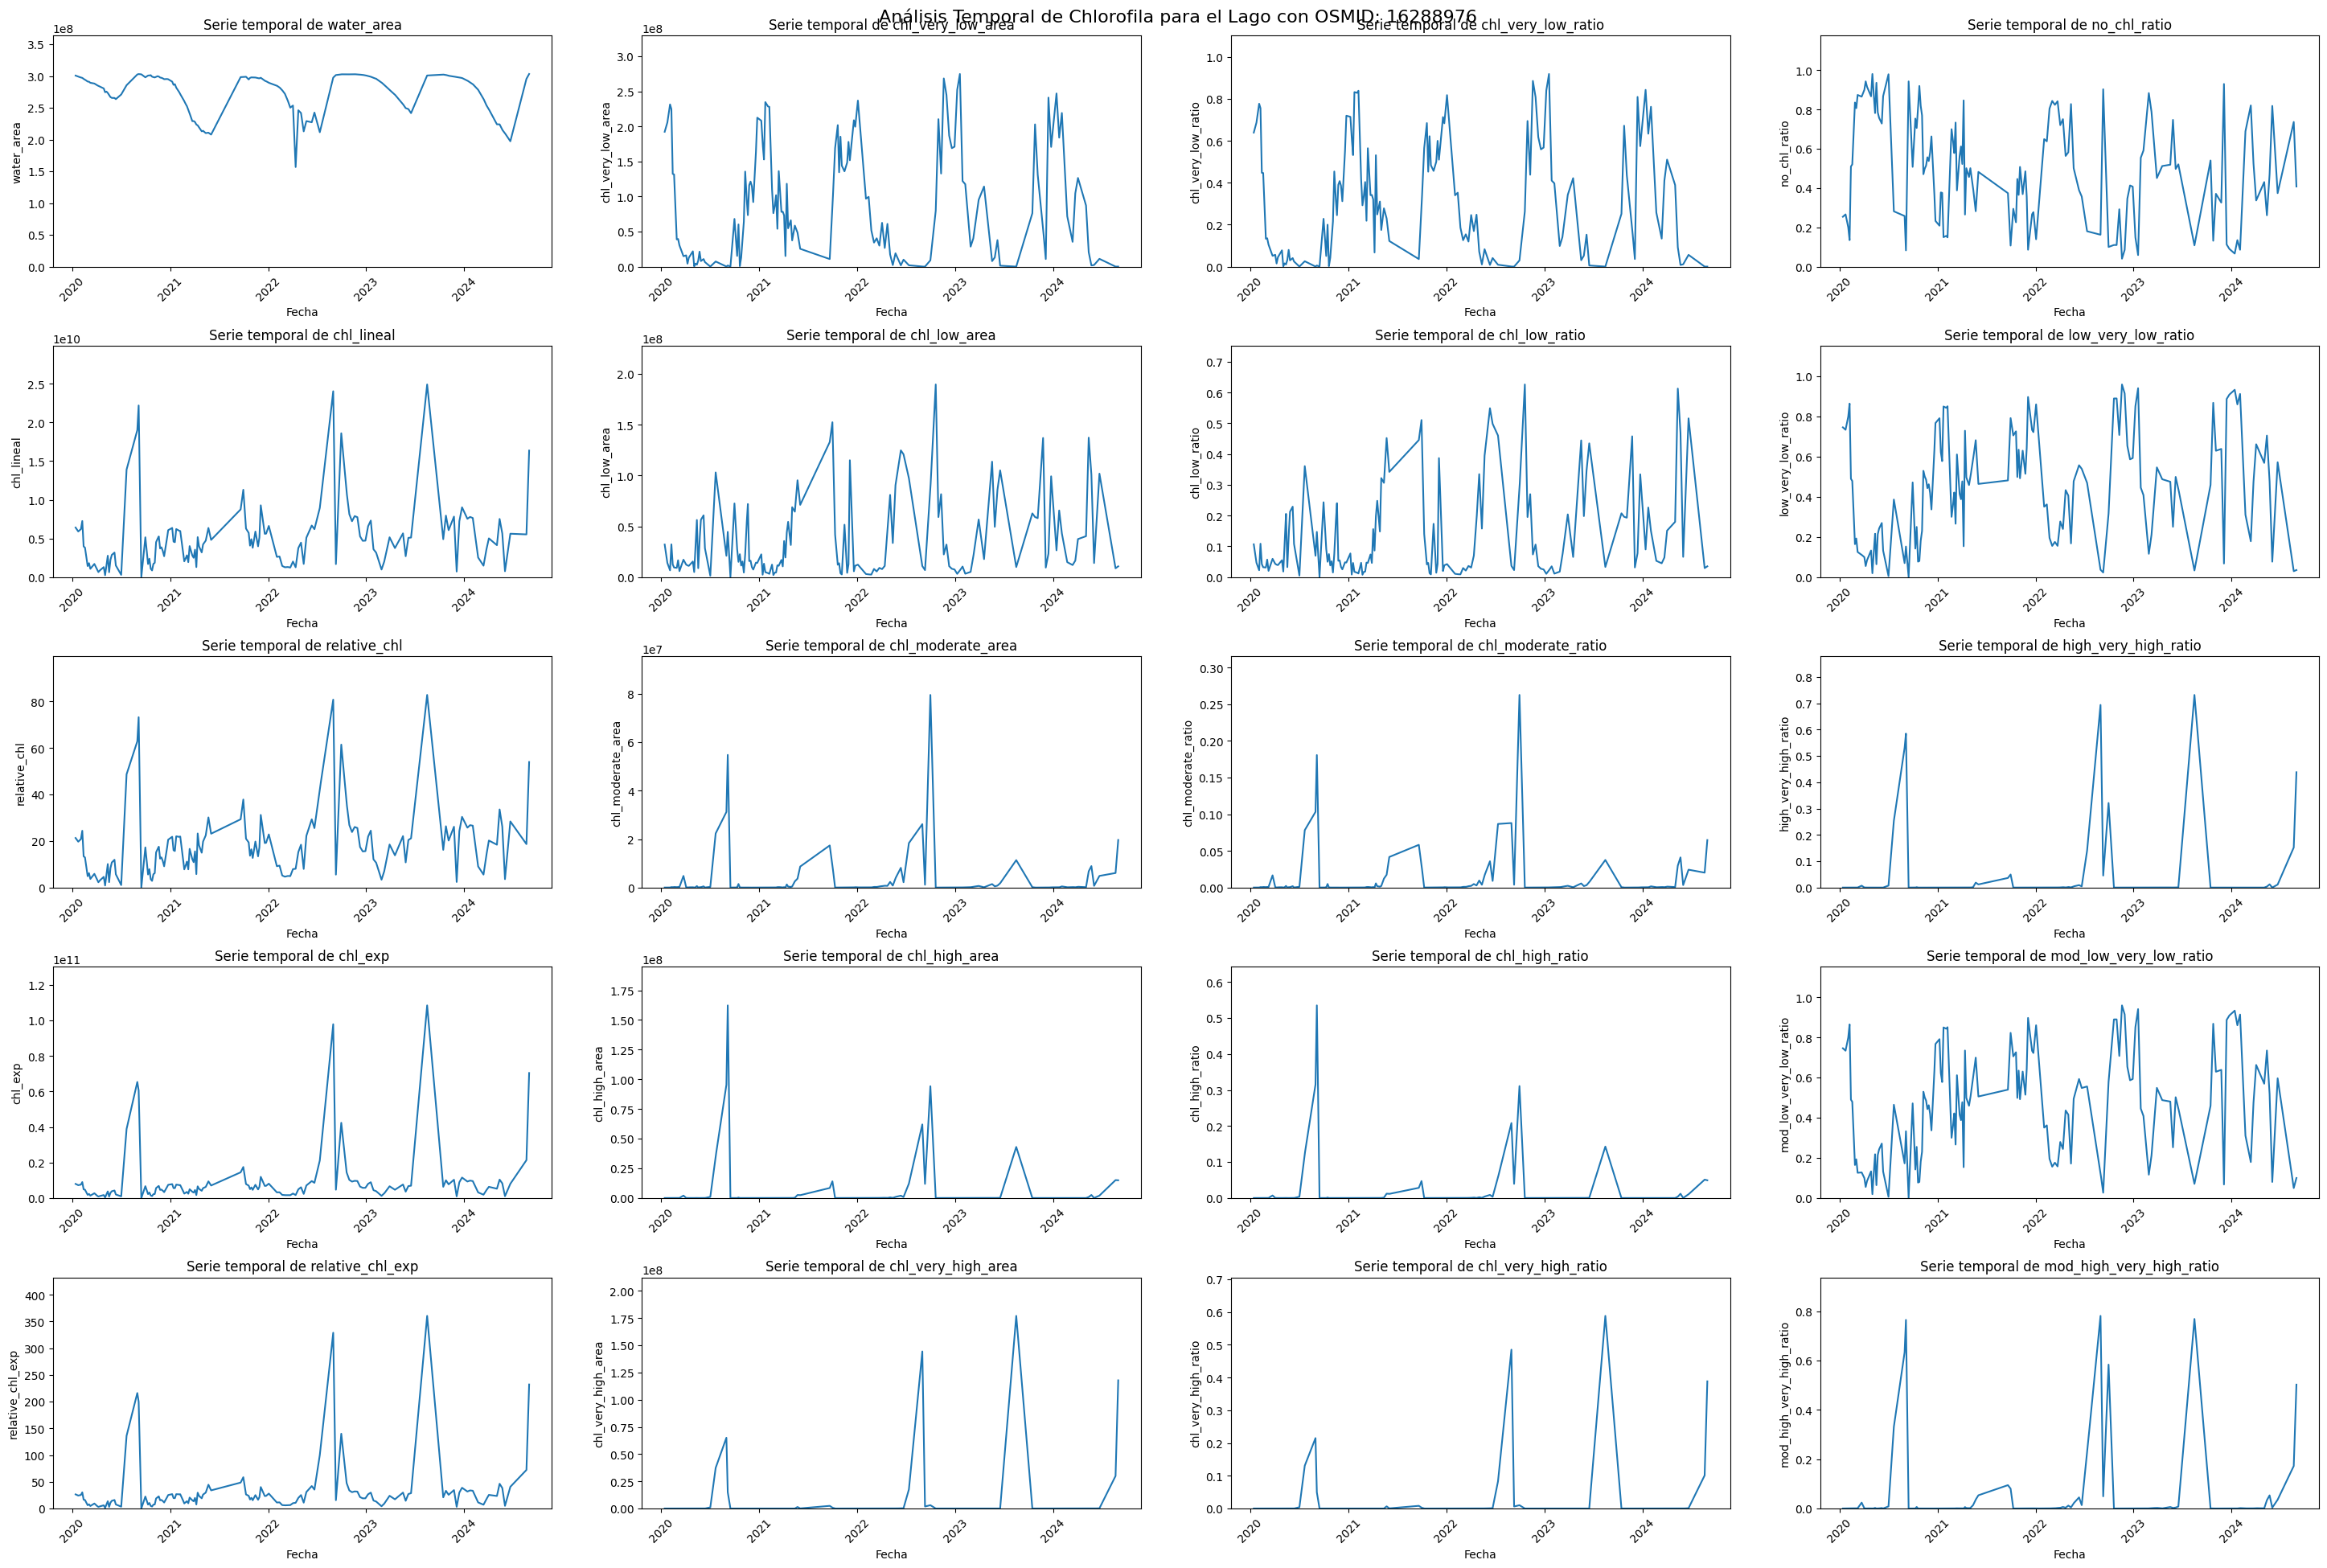

In [69]:
utils.plot_time_series(16288976)

In [65]:
ban_sagar_filtered

osmid        day    chl_lineal  relative_chl       chl_exp  \
2    16288976 2020-01-14  6.410129e+09     21.313592  7.950641e+09   
4    16288976 2020-01-24  5.897569e+09     19.718170  7.222459e+09   
6    16288976 2020-02-03  6.209606e+09     20.860441  7.555359e+09   
7    16288976 2020-02-08  7.252999e+09     24.410905  8.980011e+09   
8    16288976 2020-02-13  3.964563e+09     13.417846  4.879101e+09   
..        ...        ...           ...           ...           ...   
208  16288976 2024-05-22  5.637417e+09     26.174433  8.249025e+09   
209  16288976 2024-06-01  7.564970e+08      3.603407  1.031861e+09   
211  16288976 2024-06-21  5.608537e+09     28.426081  8.006781e+09   
215  16288976 2024-08-20  5.522249e+09     18.678766  2.133029e+10   
216  16288976 2024-08-30  1.637147e+10     53.982811  7.039277e+10   

     relative_chl_exp   water_area  cloud_area  chl_very_low_area  \
2           26.435770  300753125.0         0.0        192343750.0   
4           24.147862  299093125.0         0.0        205591250.0   
6           25.381341  297673750.0         0.0        231403125.0   
7           30.223389  297121250.0      5000.0        224631875.0   
8           16.513050  295469375.0         0.0        132252500.0   
..                ...          ...         ...                ...   
208         38.300086  215378750.0         0.0          1693750.0   
209          4.915043  209939375.0  26950000.0          2288125.0   
211         40.581246  197302500.0  10739375.0         11047500.0   
215         72.148782  295643125.0  21490625.0            15000.0   
216        232.111096  303271875.0  17234375.0             8125.0   

     chl_low_area  ...  chl_very_low_ratio  chl_low_ratio  chl_moderate_ratio  \
2      32056250.0  ...            0.639540       0.106587            0.000031   
4      13950625.0  ...            0.687382       0.046643            0.000123   
6       6621875.0  ...            0.777372       0.022245            0.000084   
7      32229375.0  ...            0.756028       0.108472            0.000602   
8      12435625.0  ...            0.447601       0.042088            0.000457   
..            ...  ...                 ...            ...                 ...   
208   100917500.0  ...            0.007864       0.468558            0.041128   
209    13800625.0  ...            0.010899       0.065736            0.003331   
211   101850000.0  ...            0.055993       0.516212            0.024350   
215     8638125.0  ...            0.000051       0.029218            0.020307   
216    10586875.0  ...            0.000027       0.034909            0.064775   

     chl_high_ratio  chl_very_high_ratio  no_chl_ratio  low_very_low_ratio  \
2          0.000000             0.000000      0.253842            0.746127   
4          0.000002             0.000000      0.265849            0.734025   
6          0.000004             0.000000      0.200295            0.799617   
7          0.000015             0.000000      0.134873            0.864500   
8          0.000011             0.000000      0.509843            0.489689   
..              ...                  ...           ...                 ...   
208        0.011912             0.000232      0.470305            0.476422   
209        0.000039             0.000000      0.818293            0.076635   
211        0.010330             0.000922      0.374051            0.572205   
215        0.051031             0.101114      0.736530            0.029269   
216        0.049281             0.388614      0.407720            0.034936   

     high_very_high_ratio  mod_low_very_low_ratio  mod_high_very_high_ratio  
2                0.000000                0.746158                  0.000031  
4                0.000002                0.734148                  0.000125  
6                0.000004                0.799701                  0.000088  
7                0.000015                0.865101                  0.000616  
8                0.000011             

In [63]:
ban_sagar_filtered['month'] = ban_sagar_filtered['day'].dt.to_period('M')

# Contar el número de registros por mes
min_cloud_area_por_mes  = ban_sagar_filtered.groupby('month')['cloud_area'].min()
registros_por_mes = ban_sagar_filtered.groupby('month').size()

# Mostrar el resultado
print(registros_por_mes)

month
2020-01    2
2020-02    5
2020-03    3
2020-04    4
2020-05    6
2020-06    2
2020-07    2
2020-08    1
2020-09    3
2020-10    5
2020-11    6
2020-12    4
2021-01    4
2021-02    5
2021-03    5
2021-04    5
2021-05    3
2021-06    1
2021-07    1
2021-08    1
2021-09    2
2021-10    4
2021-11    4
2021-12    3
2022-01    1
2022-02    3
2022-03    3
2022-04    3
2022-05    3
2022-06    2
2022-07    1
2022-08    1
2022-09    2
2022-10    2
2022-11    3
2022-12    3
2023-01    3
2023-02    2
2023-03    2
2023-04    1
2023-05    2
2023-06    2
2023-08    1
2023-09    1
2023-10    2
2023-11    2
2023-12    3
2024-01    2
2024-02    2
2024-03    2
2024-04    1
2024-05    3
2024-06    2
2024-07    1
2024-08    2
Freq: M, dtype: int64


In [31]:
ban_sagar_filtered

osmid        day    chl_lineal  relative_chl       chl_exp  \
2614  16288976 2020-01-14  6.410129e+09     21.313592  7.950641e+09   
2616  16288976 2020-01-24  5.897569e+09     19.718170  7.222459e+09   
2618  16288976 2020-02-03  6.209606e+09     20.860441  7.555359e+09   
2619  16288976 2020-02-08  7.252999e+09     24.410905  8.980011e+09   
2620  16288976 2020-02-13  3.964563e+09     13.417846  4.879101e+09   
...        ...        ...           ...           ...           ...   
2524  16288976 2024-05-22  5.637417e+09     26.174433  8.249025e+09   
2525  16288976 2024-06-01  7.564970e+08      3.603407  1.031861e+09   
2527  16288976 2024-06-21  5.608537e+09     28.426081  8.006781e+09   
2533  16288976 2024-08-20  5.522249e+09     18.678766  2.133029e+10   
2534  16288976 2024-08-30  1.637147e+10     53.982811  7.039277e+10   

      relative_chl_exp   water_area  cloud_area  chl_very_low_area  \
2614         26.435770  300753125.0         0.0        192343750.0   
2616         24.147862  299093125.0         0.0        205591250.0   
2618         25.381341  297673750.0         0.0        231403125.0   
2619         30.223389  297121250.0      5000.0        224631875.0   
2620         16.513050  295469375.0         0.0        132252500.0   
...                ...          ...         ...                ...   
2524         38.300086  215378750.0         0.0          1693750.0   
2525          4.915043  209939375.0  26950000.0          2288125.0   
2527         40.581246  197302500.0  10739375.0         11047500.0   
2533         72.148782  295643125.0  21490625.0            15000.0   
2534        232.111096  303271875.0  17234375.0             8125.0   

      chl_low_area  ...  chl_very_low_ratio  chl_low_ratio  \
2614    32056250.0  ...            0.639540       0.106587   
2616    13950625.0  ...            0.687382       0.046643   
2618     6621875.0  ...            0.777372       0.022245   
2619    32229375.0  ...            0.756028       0.108472   
2620    12435625.0  ...            0.447601       0.042088   
...            ...  ...                 ...            ...   
2524   100917500.0  ...            0.007864       0.468558   
2525    13800625.0  ...            0.010899       0.065736   
2527   101850000.0  ...            0.055993       0.516212   
2533     8638125.0  ...            0.000051       0.029218   
2534    10586875.0  ...            0.000027       0.034909   

      chl_moderate_ratio  chl_high_ratio  chl_very_high_ratio  no_chl_ratio  \
2614            0.000031        0.000000             0.000000      0.253842   
2616            0.000123        0.000002             0.000000      0.265849   
2618            0.000084        0.000004             0.000000      0.200295   
2619            0.000602        0.000015             0.000000      0.134873   
2620            0.000457        0.000011             0.000000      0.509843   
...                  ...             ...                  ...           ...   
2524            0.041128        0.011912             0.000232      0.470305   
2525            0.003331        0.000039             0.000000      0.818293   
2527            0.024350        0.010330             0.000922      0.374051   
2533            0.020307        0.051031             0.101114      0.736530   
2534            0.064775        0.049281             0.388614      0.407720   

      low_very_low_ratio  high_very_high_ratio  mod_low_very_low_ratio  \
2614            0.746127              0.000000                0.746158   
2616            0.734025              0.000002                0.734148   
2618            0.799617              0.000004                0.799701   
2619            0.864500              0.000015                0.865101   
2620            0.489689              0.000011                0.490146   
...                  ...                   ...                     ...   
2524            0.476422              0.012144                0.517550   
2525            0.076635     

In [120]:
sukhna_no_cloud

osmid        day  exists_true_image  water_area  cloud_area  \
1990  156782315 2020-10-07               True   4259300.0         0.0   
2012  156782315 2020-12-26               True  43576200.0         0.0   
1934  156782315 2021-08-03               True    705900.0         0.0   
1882  156782315 2022-01-20               True  10672300.0         0.0   
1886  156782315 2022-03-01               True   5660300.0         0.0   
1889  156782315 2022-03-31               True   1799200.0         0.0   
1864  156782315 2022-05-30               True    654300.0         0.0   
1863  156782315 2022-06-09               True    641400.0         0.0   
1835  156782315 2022-06-29               True    895400.0         0.0   
1841  156782315 2022-08-28               True   4580600.0         0.0   
1858  156782315 2023-02-14               True  34745000.0         0.0   
1958  156782315 2023-05-25               True  20600300.0         0.0   
1946  156782315 2023-06-14               True  17673000.0         0.0   
1951  156782315 2023-08-03               True  16692300.0         0.0   
1957  156782315 2023-10-02               True  28518000.0         0.0   
1918  156782315 2024-03-30               True  30678500.0         0.0   
1936  156782315 2024-06-28               True  27281300.0         0.0   

      water_with_no_clouds_area  no_chl_area  chl_very_low_area  chl_low_area  \
1990                  4259300.0    2506700.0              600.0        1400.0   
2012                 43576200.0   20198800.0             8800.0    12619700.0   
1934                   705900.0     697200.0              300.0        1200.0   
1882                 10672300.0    6153400.0              600.0      305400.0   
1886                  5660300.0    2235900.0              300.0       13500.0   
1889                  1799200.0    1785000.0              100.0         700.0   
1864                   654300.0     590700.0             2000.0       10900.0   
1863                   641400.0     562200.0             2900.0       14500.0   
1835                   895400.0     873700.0             1100.0        2100.0   
1841                  4580600.0    1643000.0             1100.0        9100.0   
1858                 34745000.0   23681400.0            31800.0     7888800.0   
1958                 20600300.0   16258000.0              200.0      642300.0   
1946                 17673000.0   10109900.0             2700.0      539500.0   
1951                 16692300.0   16609800.0             1100.0        7400.0   
1957                 28518000.0   17877400.0              500.0      439800.0   
1918                 30678500.0   17391700.0             3500.0      740200.0   
1936                 27281300.0   20877100.0              900.0      192800.0   

      chl_moderate_area  ...      distance  water            university  \
1990            12200.0  ...  78079.859558   lake  Annamalai University   
2012          5032100.0  ...  78079.859558   lake  Annamalai University   
1934             1200.0  ...  78079.859558   lake  Annamalai University   
1882          3907200.0  ...  78079.859558   lake  Annamalai University   
1886           102600.0  ...  78079.859558   lake  Annamalai University   
1889             4200.0  ...  78079.859558   lake  Annamalai University   
1864            14100.0  ...  78079.859558   lake  Annamalai University   
1863            14200.0  ...  78079.859558   lake  Annamalai University   
1835             2700.0  ...  78079.859558   lake  Annamalai University   
1841            47000.0  ...  78079.859558   lake  Annamalai University   
1858          2361400.0  ...  78079.859558   lake  Annamalai University   
1958          2234400.0  ...  78079.859558   lake  Annamalai University   
1946          2268900.0  ...  78079.859558   lake  Annamalai University   
1951            44800.0  ...  78079.859558   lake  Annamalai University   
1957          1899400.0  ...  78079.859558   lake  Annamalai University   
1918          9476700.0  ...  78079.

In [127]:
# days_to_delete = [datetime(2020,1,20), datetime(2020, 2, 9), datetime(2020, 3, 20), datetime(2020, 9, 11), datetime(2020, 11,30), datetime(2020,12,20), datetime(2021,5,9), datetime(2021,6,8), datetime(2022,10,31), datetime(2023,9,26), datetime(2020, 4, 24), datetime(2020, 5, 4), datetime(2020, 6, 18), datetime(2020, 9, 16), datetime(2020, 12, 15), datetime(2021, 3, 30),
#                   datetime(2021, 5, 29), datetime(2021, 7, 8), datetime(2022, 4, 14), datetime(2022, 9, 11), datetime(2023, 3, 30), datetime(2024, 4, 3)]

# sukhna_filtered = sukhna_no_cloud[~sukhna_no_cloud["day"].isin(days_to_delete)].copy()
sukhna_no_cloud.loc[:,"relative_chl"] = sukhna_no_cloud["chl_lineal"]/sukhna_no_cloud["water_area"]
sukhna_no_cloud.loc[:, 'relative_chl_exp'] = sukhna_no_cloud["chl_exp"]/sukhna_no_cloud["water_area"]
sukhna_filtered = sukhna_no_cloud[['osmid',  'day', 'chl_lineal', 'relative_chl', 'chl_exp', 'relative_chl_exp','exists_true_image', 'water_area', 'cloud_area',
       'water_with_no_clouds_area', 'no_chl_area', 'chl_very_low_area',
       'chl_low_area', 'chl_moderate_area', 'chl_high_area',
       'chl_very_high_area']].copy()
columns_to_divide = [
    'water_area', 'cloud_area', 'water_with_no_clouds_area', 'no_chl_area',
    'chl_very_low_area', 'chl_low_area', 'chl_moderate_area', 'chl_high_area', 'chl_very_high_area'
]

# Asegurarse de que las columnas existan en el DataFrame antes de dividirlas
sukhna_filtered.loc[:,columns_to_divide] = sukhna_filtered[columns_to_divide] / 1000000

In [128]:
sukhna_filtered.set_index('day', inplace=True)

# Crear un rango de fechas igualmente espaciadas (por ejemplo, cada día) entre el mínimo y el máximo de 'day'
all_days = pd.date_range(start=sukhna_filtered.index.min(), end=sukhna_filtered.index.max(), freq='D')

# Reindexar el DataFrame para incluir todas las fechas del rango
sukhna_reindexed = sukhna_filtered.reindex(all_days)

# Interpolar los valores faltantes de chl_lineal
sukhna_reindexed['chl_lineal'] = sukhna_reindexed['chl_lineal'].interpolate(method='linear')

# Si quieres volver a poner 'day' como una columna en lugar del índice:
sukhna_reindexed.reset_index(inplace=True)
sukhna_reindexed.rename(columns={'index': 'day'}, inplace=True)

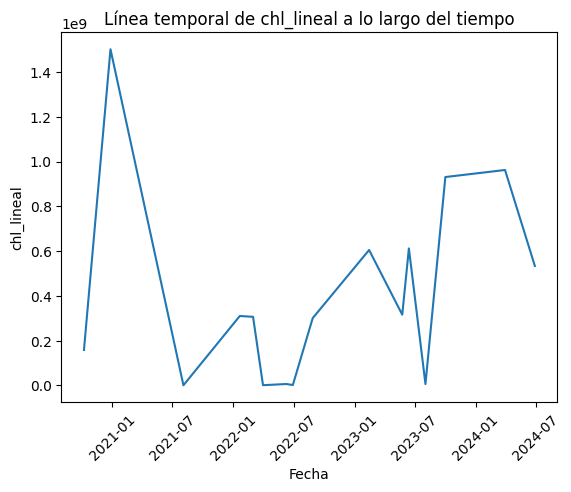

In [129]:
import matplotlib.pyplot as plt

plt.plot(sukhna_reindexed['day'], sukhna_reindexed['chl_lineal'])
plt.xlabel('Fecha')
plt.ylabel('chl_lineal')
plt.title('Línea temporal de chl_lineal a lo largo del tiempo')
plt.xticks(rotation=45)
plt.show()